## Part 1: Data Loading, Data Exploration, Data Transformations, Data Merging, Creating the ML Dataset, and Visualizing the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
provid_info = pd.read_csv("NH_ProviderInfo_Mar2022.csv", encoding='mac-roman')

In [5]:
provid_info

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,5.333,0,0,0.0,1,650.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,18.667,0,0,0.0,1,650.0,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,30.667,0,0,0.0,0,0.0,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.0,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2022-03-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,16.000,0,1,0.0,3,8333.0,0,3,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15211,686123,KENDALL LAKES HEALTH AND REHABILITATION CENTER,5280 SW 157 AVENUE,MIAMI,FL,33185,7864337400,120,Miami-Dade,For profit - Corporation,...,0.000,0,0,0.0,0,0.0,0,0,"5280 SW 157 AVENUE,MIAMI,FL,33185",2022-03-01
15212,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,3052716311,120,Miami-Dade,For profit - Corporation,...,61.600,0,2,2.0,1,13065.0,0,1,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
15213,745000,LAS ALTURAS DE PENITAS,414 LIBERTY BLVD.,PENITAS,TX,78576,5124392630,650,Hidalgo,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"414 LIBERTY BLVD.,PENITAS,TX,78576",2022-03-01
15214,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,5124382630,130,Bexar,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249",2022-03-01


In [4]:
provid_info.shape

(15216, 96)

In [7]:
# Overall balanced distribution
provid_info["Overall Rating"].value_counts()

5.0    3465
4.0    3196
2.0    3017
3.0    2850
1.0    2474
Name: Overall Rating, dtype: int64

In [6]:
# 214 instances have no overall rating
provid_info["Overall Rating"].isnull().sum()

214

In [10]:
provid_info[pd.isna(provid_info["Overall Rating"])][["Overall Rating", "Federal Provider Number"]]

,Overall Rating,Federal Provider Number
72,NaN,015144
224,NaN,015471
322,NaN,035175
386,NaN,035298
387,NaN,035299
...,...,...
15209,NaN,676498
15210,NaN,676499
15213,NaN,745000
15214,NaN,745001


In [11]:
# Drop those 214 nursing homes and resave it as a new CSV file
df = provid_info.dropna(subset=["Overall Rating"])

In [15]:
df.shape

(15002, 96)

In [16]:
df.to_csv("ProviderInfo_Mar22_AllRatings.csv", index=False)

In [2]:
meas_claims = pd.read_csv("NH_QualityMsr_Claims_Mar2022.csv", encoding='mac-roman')
meas_claims

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Adjusted Score,Observed Score,Expected Score,Footnote for Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,521,Percentage of short-stay residents who were re...,Short Stay,19.653524,18.181818,21.646080,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,522,Percentage of short-stay residents who had an ...,Short Stay,2.159487,2.272727,10.733844,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,551,Number of hospitalizations per 1000 long-stay ...,Long Stay,0.888825,1.105630,2.073423,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,552,Number of outpatient emergency department visi...,Long Stay,0.298808,0.425242,1.904792,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,521,Percentage of short-stay residents who were re...,Short Stay,16.512389,16.666667,23.616809,NaN,Y,20200701-20210630,"260 WEST WALNUT STREET, SYLACAUGA, AL, 35150",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60859,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,552,Number of outpatient emergency department visi...,Long Stay,NaN,NaN,NaN,10.0,Y,20200701-20210630,"4366 LOCKHILL SELMA, SHAVANO PARK, TX, 78249",2022-03-01
60860,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,521,Percentage of short-stay residents who were re...,Short Stay,NaN,NaN,NaN,10.0,Y,20200701-20210630,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
60861,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,522,Percentage of short-stay residents who had an ...,Short Stay,NaN,NaN,NaN,10.0,Y,20200701-20210630,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
60862,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,551,Number of hospitalizations per 1000 long-stay ...,Long Stay,NaN,NaN,NaN,10.0,Y,20200701-20210630,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01


In [6]:
meas_claims.shape

(60864, 17)

In [60]:
#15,216 nursing homes total in this dataset
len(meas_claims["Federal Provider Number"].unique())

15216

In [24]:
# Only 4 possible measures in this dataset
meas_claims["Measure Description"].unique()

array(['Percentage of short-stay residents who were rehospitalized after a nursing home admission',
       'Percentage of short-stay residents who had an outpatient emergency department visit',
       'Number of hospitalizations per 1000 long-stay resident days',
       'Number of outpatient emergency department visits per 1000 long-stay resident days'],
      dtype=object)

In [18]:
# 10,350 total missing values in this col. But how many of them are missing for each nursing home?
meas_claims["Adjusted Score"].isnull().sum()

10350

In [19]:
meas_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60864 entries, 0 to 60863
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Federal Provider Number                   60864 non-null  object 
 1   Provider Name                             60864 non-null  object 
 2   Provider Address                          60864 non-null  object 
 3   Provider City                             60864 non-null  object 
 4   Provider State                            60864 non-null  object 
 5   Provider Zip Code                         60864 non-null  int64  
 6   Measure Code                              60864 non-null  int64  
 7   Measure Description                       60864 non-null  object 
 8   Resident type                             60864 non-null  object 
 9   Adjusted Score                            50514 non-null  float64
 10  Observed Score                    

In [71]:
res = meas_claims.groupby("Federal Provider Number").agg({"Adjusted Score": lambda x: x.isnull().sum()}) 
res = res.rename({"Adjusted Score": "Num_Missing_Scores"}, axis=1).reset_index()
res

,Federal Provider Number,Num_Missing_Scores
0,015009,0.0
1,015010,0.0
2,015012,0.0
3,015014,2.0
4,015015,0.0
...,...,...
15211,686123,0.0
15212,686124,0.0
15213,745000,4.0
15214,745001,4.0


In [73]:
# How many nursing homes have all 4 measure values NOT missing?
len(res[res["Num_Missing_Scores"] == 0])

10899

In [74]:
res[res["Num_Missing_Scores"] == 0]

,Federal Provider Number,Num_Missing_Scores
0,015009,0.0
1,015010,0.0
2,015012,0.0
4,015015,0.0
5,015016,0.0
...,...,...
15202,676491,0.0
15204,676493,0.0
15205,676494,0.0
15211,686123,0.0


In [76]:
pnum_list = res[res["Num_Missing_Scores"] == 0]["Federal Provider Number"].to_list()
pnum_list

['015009',
 '015010',
 '015012',
 '015015',
 '015016',
 '015019',
 '015023',
 '015024',
 '015027',
 '015028',
 '015031',
 '015032',
 '015034',
 '015035',
 '015042',
 '015044',
 '015047',
 '015049',
 '015053',
 '015063',
 '015065',
 '015066',
 '015067',
 '015073',
 '015075',
 '015076',
 '015083',
 '015084',
 '015089',
 '015091',
 '015100',
 '015103',
 '015111',
 '015113',
 '015114',
 '015115',
 '015116',
 '015117',
 '015119',
 '015120',
 '015121',
 '015126',
 '015127',
 '015128',
 '015129',
 '015132',
 '015133',
 '015134',
 '015137',
 '015138',
 '015139',
 '015141',
 '015142',
 '015143',
 '015144',
 '015145',
 '015147',
 '015148',
 '015149',
 '015150',
 '015152',
 '015153',
 '015154',
 '015155',
 '015156',
 '015157',
 '015158',
 '015159',
 '015160',
 '015162',
 '015163',
 '015164',
 '015166',
 '015168',
 '015169',
 '015171',
 '015174',
 '015175',
 '015176',
 '015177',
 '015179',
 '015180',
 '015182',
 '015183',
 '015184',
 '015186',
 '015187',
 '015188',
 '015189',
 '015192',
 '015194',

In [77]:
# 10899 nursing homes is still enough data to work with for this investigative study. 
# Let's keep only the nursing homes that have values for all 4 measures.
meas_claims[meas_claims["Federal Provider Number"].isin(pnum_list)]

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Adjusted Score,Observed Score,Expected Score,Footnote for Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,521,Percentage of short-stay residents who were re...,Short Stay,19.653524,18.181818,21.646080,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,522,Percentage of short-stay residents who had an ...,Short Stay,2.159487,2.272727,10.733844,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,551,Number of hospitalizations per 1000 long-stay ...,Long Stay,0.888825,1.105630,2.073423,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,552,Number of outpatient emergency department visi...,Long Stay,0.298808,0.425242,1.904792,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,521,Percentage of short-stay residents who were re...,Short Stay,16.512389,16.666667,23.616809,NaN,Y,20200701-20210630,"260 WEST WALNUT STREET, SYLACAUGA, AL, 35150",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60847,686123,KENDALL LAKES HEALTH AND REHABILITATION CENTER,5280 SW 157 AVENUE,MIAMI,FL,33185,552,Number of outpatient emergency department visi...,Long Stay,0.406249,0.758450,2.498832,NaN,Y,20200701-20210630,"5280 SW 157 AVENUE, MIAMI, FL, 33185",2022-03-01
60848,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,521,Percentage of short-stay residents who were re...,Short Stay,24.052761,29.411765,28.611362,NaN,Y,20200701-20210630,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01
60849,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,522,Percentage of short-stay residents who had an ...,Short Stay,1.346075,1.470588,11.142443,NaN,Y,20200701-20210630,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01
60850,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,551,Number of hospitalizations per 1000 long-stay ...,Long Stay,1.577436,1.885992,1.992885,NaN,Y,20200701-20210630,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01


In [61]:
# Save this data above to a new CSV file for now (later we will do pivot-wider operation)
df_temp = meas_claims[meas_claims["Federal Provider Number"].isin(pnum_list)]
df_temp.to_csv("MsrClaims_Mar22_AllScores.csv", index=False)

In [2]:
Claims_meas = pd.read_csv("./main data/MsrClaims_Mar22_AllScores.csv", encoding='mac-roman', converters={"Federal Provider Number": str})

In [23]:
Claims_meas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43596 entries, 0 to 43595
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Federal Provider Number                   43596 non-null  object 
 1   Provider Name                             43596 non-null  object 
 2   Provider Address                          43596 non-null  object 
 3   Provider City                             43596 non-null  object 
 4   Provider State                            43596 non-null  object 
 5   Provider Zip Code                         43596 non-null  int64  
 6   Measure Code                              43596 non-null  int64  
 7   Measure Description                       43596 non-null  object 
 8   Resident type                             43596 non-null  object 
 9   Adjusted Score                            43596 non-null  float64
 10  Observed Score                    

In [3]:
Claims_meas.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code', 'Measure Code',
       'Measure Description', 'Resident type', 'Adjusted Score',
       'Observed Score', 'Expected Score', 'Footnote for Score',
       'Used in Quality Measure Five Star Rating', 'Measure Period',
       'Location', 'Processing Date'],
      dtype='object')

In [4]:
# What are the unique Claims-based QMs?
Claims_meas["Measure Description"].unique()

array(['Percentage of short-stay residents who were rehospitalized after a nursing home admission',
       'Percentage of short-stay residents who had an outpatient emergency department visit',
       'Number of hospitalizations per 1000 long-stay resident days',
       'Number of outpatient emergency department visits per 1000 long-stay resident days'],
      dtype=object)

In [5]:
# Which Claims-based QMs are included in the QM rating calculation?
Claims_meas[Claims_meas["Used in Quality Measure Five Star Rating"] == "Y"]["Measure Description"].unique()

array(['Percentage of short-stay residents who were rehospitalized after a nursing home admission',
       'Percentage of short-stay residents who had an outpatient emergency department visit',
       'Number of hospitalizations per 1000 long-stay resident days',
       'Number of outpatient emergency department visits per 1000 long-stay resident days'],
      dtype=object)

In [7]:
# Which Claims-based QMs are NOT included in the QM rating calculation? Answer: none.
Claims_meas[Claims_meas["Used in Quality Measure Five Star Rating"] == "N"]["Measure Description"].unique()

array([], dtype=object)

In [22]:
Claims_meas[["Measure Description", "Adjusted Score"]].head()

,Measure Description,Adjusted Score
0,Percentage of short-stay residents who were re...,19.653524
1,Percentage of short-stay residents who had an ...,2.159487
2,Number of hospitalizations per 1000 long-stay ...,0.888825
3,Number of outpatient emergency department visi...,0.298808
4,Percentage of short-stay residents who were re...,16.512389


In [10]:
meas_MDS = pd.read_csv("NH_QualityMsr_MDS_Mar2022.csv", encoding='mac-roman', converters={"Federal Provider Number": str})
meas_MDS

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,18.18182,...,18.18182,NaN,7.31707,NaN,14.792900,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,4.65116,...,4.54545,NaN,6.66667,NaN,6.249999,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,9.0,NaN,9.0,70.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,0.00000,...,0.00000,NaN,0.00000,NaN,0.408016,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,2.17391,...,0.00000,NaN,0.00000,NaN,0.540540,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273883,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,452,Percentage of long-stay residents who received...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273884,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,453,Percentage of high risk long-stay residents wi...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273885,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,454,Percentage of long-stay residents assessed and...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273886,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,471,Percentage of short-stay residents who made im...,Short Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01


In [13]:
meas_MDS.head(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,18.181820,...,18.181820,NaN,7.317070,NaN,14.792900,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,4.651160,...,4.545450,NaN,6.666670,NaN,6.249999,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,9.0,NaN,9.0,70.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,0.000000,...,0.000000,NaN,0.000000,NaN,0.408016,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,2.173910,...,0.000000,NaN,0.000000,NaN,0.540540,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
5,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,408,Percentage of long-stay residents who have dep...,Long Stay,0.000000,...,2.222220,NaN,0.000000,NaN,1.098901,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
6,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,409,Percentage of long-stay residents who were phy...,Long Stay,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
7,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,410,Percentage of long-stay residents experiencing...,Long Stay,2.083330,...,0.000000,NaN,2.127660,NaN,2.094241,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
8,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,415,Percentage of long-stay residents assessed and...,Long Stay,100.000000,...,100.000000,NaN,100.000000,NaN,100.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
9,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,419,Percentage of long-stay residents who received...,Long Stay,15.217390,...,6.666670,NaN,4.444440,NaN,9.392264,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01


In [14]:
meas_MDS.tail(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
273868,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,471,Percentage of short-stay residents who made im...,Short Stay,NaN,...,NaN,10.0,NaN,9.0,NaN,9.0,Y,2020Q4-2021Q3,"4366 LOCKHILL SELMA, SHAVANO PARK, TX, 78249",2022-03-01
273869,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,472,Percentage of short-stay residents who were as...,Short Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"4366 LOCKHILL SELMA, SHAVANO PARK, TX, 78249",2022-03-01
273870,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,401,Percentage of long-stay residents whose need f...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273871,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,404,Percentage of long-stay residents who lose too...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273872,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273873,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,406,Percentage of long-stay residents with a cathe...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273874,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,407,Percentage of long-stay residents with a urina...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273875,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,408,Percentage of long-stay residents who have dep...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273876,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,409,Percentage of long-stay residents who were phy...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,N,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01
273877,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,410,Percentage of long-stay residents experiencing...,Long Stay,NaN,...,NaN,10.0,NaN,10.0,NaN,10.0,Y,2020Q4-2021Q3,"1443 NORTH MAIN, JAYTON, TX, 79528",2022-03-01


In [64]:
meas_MDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273888 entries, 0 to 273887
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Federal Provider Number                   273888 non-null  object 
 1   Provider Name                             273888 non-null  object 
 2   Provider Address                          273888 non-null  object 
 3   Provider City                             273888 non-null  object 
 4   Provider State                            273888 non-null  object 
 5   Provider Zip Code                         273888 non-null  int64  
 6   Measure Code                              273888 non-null  int64  
 7   Measure Description                       273888 non-null  object 
 8   Resident type                             273888 non-null  object 
 9   Q1 Measure Score                          225068 non-null  float64
 10  Footnote for Q1 Meas

In [65]:
# There are 12901 total missing values in the "Four Quarter Average Score" col
meas_MDS["Four Quarter Average Score"].isnull().sum()

12901

In [66]:
meas_MDS["Measure Description"].unique()

array(['Percentage of long-stay residents whose need for help with daily activities has increased',
       'Percentage of long-stay residents who lose too much weight',
       'Percentage of low risk long-stay residents who lose control of their bowels or bladder',
       'Percentage of long-stay residents with a catheter inserted and left in their bladder',
       'Percentage of long-stay residents with a urinary tract infection',
       'Percentage of long-stay residents who have depressive symptoms',
       'Percentage of long-stay residents who were physically restrained',
       'Percentage of long-stay residents experiencing one or more falls with major injury',
       'Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of long-stay residents who received an antipsychotic medication',
       'Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of short-stay 

In [67]:
# How many unique measure values are there?
len(meas_MDS["Measure Description"].unique())

18

In [70]:
# Let's look to see the number of missing 4Q average scores that each nursing home has.
# There is a 4Q average score per each of the 18 measures.
res_mds = meas_MDS.groupby("Federal Provider Number").agg({"Four Quarter Average Score": lambda x: x.isnull().sum()})
res_mds = res_mds.rename({"Four Quarter Average Score": "Num_Missing_Scores"}, axis=1).reset_index()
res_mds

,Federal Provider Number,Num_Missing_Scores
0,015009,0.0
1,015010,0.0
2,015012,0.0
3,015014,2.0
4,015015,0.0
...,...,...
15211,686123,0.0
15212,686124,0.0
15213,745000,16.0
15214,745001,17.0


In [78]:
# How many nursing homes have values for all 18 measures? Answer: 11679. This is still sufficient enough to drop the rest.
res_mds[res_mds["Num_Missing_Scores"]==0]

,Federal Provider Number,Num_Missing_Scores
0,015009,0.0
1,015010,0.0
2,015012,0.0
4,015015,0.0
5,015016,0.0
...,...,...
15196,676485,0.0
15199,676488,0.0
15205,676494,0.0
15211,686123,0.0


In [79]:
fpnum_list = res_mds[res_mds["Num_Missing_Scores"]==0]["Federal Provider Number"].to_list()
fpnum_list

['015009',
 '015010',
 '015012',
 '015015',
 '015016',
 '015019',
 '015023',
 '015024',
 '015027',
 '015028',
 '015031',
 '015032',
 '015034',
 '015035',
 '015037',
 '015040',
 '015042',
 '015044',
 '015045',
 '015047',
 '015049',
 '015050',
 '015053',
 '015063',
 '015065',
 '015066',
 '015067',
 '015073',
 '015075',
 '015076',
 '015083',
 '015084',
 '015089',
 '015091',
 '015097',
 '015098',
 '015100',
 '015103',
 '015109',
 '015111',
 '015112',
 '015113',
 '015114',
 '015115',
 '015116',
 '015117',
 '015119',
 '015120',
 '015121',
 '015126',
 '015127',
 '015128',
 '015129',
 '015132',
 '015133',
 '015134',
 '015136',
 '015137',
 '015138',
 '015139',
 '015141',
 '015142',
 '015143',
 '015144',
 '015145',
 '015147',
 '015148',
 '015150',
 '015151',
 '015152',
 '015153',
 '015154',
 '015155',
 '015156',
 '015157',
 '015158',
 '015159',
 '015160',
 '015162',
 '015163',
 '015164',
 '015171',
 '015174',
 '015175',
 '015176',
 '015177',
 '015179',
 '015180',
 '015182',
 '015183',
 '015184',

In [80]:
# Let's grab only those nursing home records that have measure values for all 18
meas_MDS[meas_MDS["Federal Provider Number"].isin(fpnum_list)]

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,18.181820,...,18.181820,NaN,7.317070,NaN,14.792900,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,4.651160,...,4.545450,NaN,6.666670,NaN,6.249999,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,9.0,NaN,9.0,70.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,0.000000,...,0.000000,NaN,0.000000,NaN,0.408016,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,2.173910,...,0.000000,NaN,0.000000,NaN,0.540540,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273829,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,452,Percentage of long-stay residents who received...,Long Stay,31.428570,...,34.558820,NaN,30.769230,NaN,32.730560,NaN,N,2020Q4-2021Q3,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01
273830,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,453,Percentage of high risk long-stay residents wi...,Long Stay,7.299270,...,7.031250,NaN,6.716420,NaN,7.330828,NaN,Y,2020Q4-2021Q3,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01
273831,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,454,Percentage of long-stay residents assessed and...,Long Stay,98.837209,...,96.000000,NaN,96.000000,NaN,96.700143,NaN,N,2020Q4-2021Q3,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01
273832,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,471,Percentage of short-stay residents who made im...,Short Stay,40.048864,...,57.684715,NaN,64.243164,NaN,52.076941,NaN,Y,2020Q4-2021Q3,"9820 N KENDALL DRIVE, MIAMI, FL, 33176",2022-03-01


In [81]:
df_temp = meas_MDS[meas_MDS["Federal Provider Number"].isin(fpnum_list)]
df_temp.to_csv("MsrMDS_Mar22_AllScores.csv", index=False)

In [19]:
MDS_measures = pd.read_csv("./main data/MsrMDS_Mar22_AllScores.csv", encoding='mac-roman', converters={"Federal Provider Number": str})

In [23]:
# What are the unique measures?
MDS_measures["Measure Description"].unique()

array(['Percentage of long-stay residents whose need for help with daily activities has increased',
       'Percentage of long-stay residents who lose too much weight',
       'Percentage of low risk long-stay residents who lose control of their bowels or bladder',
       'Percentage of long-stay residents with a catheter inserted and left in their bladder',
       'Percentage of long-stay residents with a urinary tract infection',
       'Percentage of long-stay residents who have depressive symptoms',
       'Percentage of long-stay residents who were physically restrained',
       'Percentage of long-stay residents experiencing one or more falls with major injury',
       'Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of long-stay residents who received an antipsychotic medication',
       'Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of short-stay 

In [22]:
# How many unique MDS-based QMs?
len(MDS_measures["Measure Description"].unique())

18

In [12]:
MDS_measures[MDS_measures["Used in Quality Measure Five Star Rating"] == "Y"]["Measure Description"].unique()

array(['Percentage of long-stay residents whose need for help with daily activities has increased',
       'Percentage of long-stay residents with a catheter inserted and left in their bladder',
       'Percentage of long-stay residents with a urinary tract infection',
       'Percentage of long-stay residents experiencing one or more falls with major injury',
       'Percentage of long-stay residents who received an antipsychotic medication',
       'Percentage of short-stay residents who newly received an antipsychotic medication',
       'Percentage of long-stay residents whose ability to move independently worsened',
       'Percentage of high risk long-stay residents with pressure ulcers',
       'Percentage of short-stay residents who made improvements in function'],
      dtype=object)

In [13]:
len(MDS_measures[MDS_measures["Used in Quality Measure Five Star Rating"] == "Y"]["Measure Description"].unique())

9

In [17]:
MDS_measures[MDS_measures["Used in Quality Measure Five Star Rating"] == "N"]["Measure Description"].unique()

array(['Percentage of long-stay residents who lose too much weight',
       'Percentage of low risk long-stay residents who lose control of their bowels or bladder',
       'Percentage of long-stay residents who have depressive symptoms',
       'Percentage of long-stay residents who were physically restrained',
       'Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine',
       'Percentage of long-stay residents who received an antianxiety or hypnotic medication',
       'Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine',
       'Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine'],
      dtype=object)

In [20]:
MDS_measures.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code', 'Measure Code',
       'Measure Description', 'Resident type', 'Q1 Measure Score',
       'Footnote for Q1 Measure Score', 'Q2 Measure Score',
       'Footnote for Q2 Measure Score', 'Q3 Measure Score',
       'Footnote for Q3 Measure Score', 'Q4 Measure Score',
       'Footnote for Q4 Measure Score', 'Four Quarter Average Score',
       'Footnote for Four Quarter Average Score',
       'Used in Quality Measure Five Star Rating', 'Measure Period',
       'Location', 'Processing Date'],
      dtype='object')

In [21]:
MDS_measures[["Measure Description", "Four Quarter Average Score"]].head(5)

,Measure Description,Four Quarter Average Score
0,Percentage of long-stay residents whose need f...,14.792900
1,Percentage of long-stay residents who lose too...,6.249999
2,Percentage of low risk long-stay residents who...,70.000000
3,Percentage of long-stay residents with a cathe...,0.408016
4,Percentage of long-stay residents with a urina...,0.540540


In [8]:
health_def = pd.read_csv("./main data/NH_HealthCitations_Mar2022.csv", encoding='mac-roman', converters={"Federal Provider Number": str})
health_def

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Category,...,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2019-08-21,Health,F,Resident Rights Deficiencies,...,Allow residents to self-administer drugs if de...,D,"Deficient, Provider has date of correction",2019-09-16,1,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2019-08-21,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2019-09-16,1,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2018-08-01,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2018-09-05,2,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
3,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2019-06-13,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2019-07-17,1,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2018-06-07,Health,F,Resident Assessment and Care Planning Deficien...,...,Develop and implement a complete care plan tha...,D,"Deficient, Provider has date of correction",2018-07-12,2,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372921,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2019-05-17,Health,F,Quality of Life and Care Deficiencies,...,Provide appropriate care for a resident to mai...,D,"Deficient, Provider has date of correction",2019-06-07,2,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372922,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,2021-02-04,Health,F,Resident Rights Deficiencies,...,Honor the resident's right to a dignified exis...,E,"Deficient, Provider has date of correction",2021-03-15,1,Y,N,N,"1443 NORTH MAIN,JAYTON,TX,79528",2022-03-01
372923,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,2021-02-04,Health,F,Quality of Life and Care Deficiencies,...,Provide appropriate treatment and care accordi...,D,"Deficient, Provider has date of correction",2021-03-15,1,Y,N,N,"1443 NORTH MAIN,JAYTON,TX,79528",2022-03-01
372924,745002,KENT COUNTY NURSING HOME,1443 NORTH MAIN,JAYTON,TX,79528,2021-02-04,Health,F,Nutrition and Dietary Deficiencies,...,Procure food from sources approved or consider...,F,"Deficient, Provider has date of correction",2021-03-15,1,Y,N,N,"1443 NORTH MAIN,JAYTON,TX,79528",2022-03-01


In [17]:
health_def.head(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Category,...,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2019-08-21,Health,F,Resident Rights Deficiencies,...,Allow residents to self-administer drugs if de...,D,"Deficient, Provider has date of correction",2019-09-16,1,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2019-08-21,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2019-09-16,1,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2018-08-01,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2018-09-05,2,Y,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
3,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2019-06-13,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2019-07-17,1,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2018-06-07,Health,F,Resident Assessment and Care Planning Deficien...,...,Develop and implement a complete care plan tha...,D,"Deficient, Provider has date of correction",2018-07-12,2,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
5,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2018-06-07,Health,F,Quality of Life and Care Deficiencies,...,Try different approaches before using a bed ra...,E,"Deficient, Provider has date of correction",2018-07-12,2,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
6,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2018-06-07,Health,F,Nutrition and Dietary Deficiencies,...,Procure food from sources approved or consider...,F,"Deficient, Provider has date of correction",2018-07-12,2,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
7,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2018-06-07,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2018-07-12,2,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
8,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2017-04-06,Health,F,Resident Rights Deficiencies,...,Provide care for residents in a way that maint...,D,"Deficient, Provider has date of correction",2017-05-10,3,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
9,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2017-04-06,Health,F,Environmental Deficiencies,...,Provide housekeeping and maintenance services.,D,"Deficient, Provider has date of correction",2017-05-10,3,Y,N,N,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01


In [18]:
health_def.tail(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Category,...,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Location,Processing Date
372906,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Pharmacy Service Deficiencies,...,Ensure drugs and biologicals used in the facil...,E,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372907,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Nutrition and Dietary Deficiencies,...,Procure food from sources approved or consider...,E,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372908,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Quality of Life and Care Deficiencies,...,Provide or get specialized rehabilitative serv...,D,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372909,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Administration Deficiencies,...,Set up an ongoing quality assessment and assur...,D,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372910,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,D,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372911,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Environmental Deficiencies,...,Keep all essential equipment working safely.,E,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372912,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2021-02-12,Health,F,Environmental Deficiencies,...,"Make sure that the nursing home area is safe, ...",E,"Deficient, Provider has date of correction",2021-03-14,1,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372913,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2020-06-24,Health,F,Resident Assessment and Care Planning Deficien...,...,Safeguard resident-identifiable information an...,D,"Deficient, Provider has date of correction",2020-06-24,2,N,Y,Y,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372914,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2020-06-24,Health,F,Infection Control Deficiencies,...,Provide and implement an infection prevention ...,E,"Deficient, Provider has date of correction",2020-06-24,2,N,Y,Y,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
372915,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2019-05-17,Health,F,Resident Rights Deficiencies,...,Honor the resident's right to voice grievances...,D,"Deficient, Provider has date of correction",2019-06-07,2,Y,N,N,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01


In [83]:
# Looking primarily at the "Scope Severity Code" col
# No missing values at all, great!
health_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372926 entries, 0 to 372925
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Federal Provider Number                  372926 non-null  object
 1   Provider Name                            372926 non-null  object
 2   Provider Address                         372926 non-null  object
 3   Provider City                            372926 non-null  object
 4   Provider State                           372926 non-null  object
 5   Provider Zip Code                        372926 non-null  int64 
 6   Survey Date                              372926 non-null  object
 7   Survey Type                              372926 non-null  object
 8   Deficiency Prefix                        372926 non-null  object
 9   Deficiency Category                      372926 non-null  object
 10  Deficiency Tag Number                    372

In [9]:
health_def[["Scope Severity Code"]].head(5)

,Scope Severity Code
0,D
1,D
2,D
3,D
4,D


In [91]:
import numpy as np
np.sort(health_def["Scope Severity Code"].unique())

array(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
      dtype=object)

In [94]:
# At a glance, we can see some nursing homes have a bigger amount of health deficiencies compared to others.
# Nursing home with Fed.Prov.Num. 505491 has 147 deficiencies documented.
health_def["Federal Provider Number"].value_counts()

056078    168
505491    147
365499    147
215094    144
145926    144
         ... 
366366      1
366223      1
676452      1
195481      1
115627      1
Name: Federal Provider Number, Length: 15087, dtype: int64

In [84]:
# Most of the deficiencies are code D, which refer to less severe deficiencies.
health_def["Scope Severity Code"].value_counts()

D    228465
E     90498
F     24847
G     10479
B      6247
C      5376
J      3899
K      1655
L       874
H       549
I        37
Name: Scope Severity Code, dtype: int64

In [10]:
survey_sum = pd.read_csv("./main data/NH_SurveySummary_Mar2022.csv", encoding='mac-roman', converters={"Federal Provider Number": str})
survey_sum

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Inspection Cycle,Health Survey Date,Fire Safety Survey Date,Total Number of Health Deficiencies,...,Count of Interior Deficiencies,Count of Gas and Vacuum and Electrical Systems Deficiencies,Count of Hazardous Area Deficiencies,Count of Illumination and Emergency Power Deficiencies,Count of Laboratories Deficiencies,Count of Medical Gases and Anaesthetizing Areas Deficiencies,Count of Smoking Regulations Deficiencies,Count of Miscellaneous Deficiencies,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,1,2019-08-21,2019-08-21,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2,2018-08-01,2018-08-09,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,3,2017-06-22,2017-06-29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
3,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,1,2019-06-13,2019-06-18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2,2018-06-07,2018-06-11,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45255,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,1,2021-02-12,2021-02-16,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
45256,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,2,2019-05-17,2019-05-15,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
45257,745000,LAS ALTURAS DE PENITAS,414 LIBERTY BLVD.,PENITAS,TX,78576,1,2021-07-08,2021-07-08,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"414 LIBERTY BLVD.,PENITAS,TX,78576",2022-03-01
45258,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,1,2021-07-16,2021-07-16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249",2022-03-01


In [19]:
survey_sum.head(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Inspection Cycle,Health Survey Date,Fire Safety Survey Date,Total Number of Health Deficiencies,...,Count of Interior Deficiencies,Count of Gas and Vacuum and Electrical Systems Deficiencies,Count of Hazardous Area Deficiencies,Count of Illumination and Emergency Power Deficiencies,Count of Laboratories Deficiencies,Count of Medical Gases and Anaesthetizing Areas Deficiencies,Count of Smoking Regulations Deficiencies,Count of Miscellaneous Deficiencies,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,1,2019-08-21,2019-08-21,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2,2018-08-01,2018-08-09,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,3,2017-06-22,2017-06-29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
3,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,1,2019-06-13,2019-06-18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2,2018-06-07,2018-06-11,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
5,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,3,2017-04-06,2017-04-11,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
6,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,1,2019-06-06,2019-06-12,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
7,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2,2018-05-03,2018-05-03,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
8,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,3,2017-03-16,2017-03-16,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
9,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,1,2020-02-20,2020-02-24,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2022-03-01


In [20]:
survey_sum.tail(20)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Inspection Cycle,Health Survey Date,Fire Safety Survey Date,Total Number of Health Deficiencies,...,Count of Interior Deficiencies,Count of Gas and Vacuum and Electrical Systems Deficiencies,Count of Hazardous Area Deficiencies,Count of Illumination and Emergency Power Deficiencies,Count of Laboratories Deficiencies,Count of Medical Gases and Anaesthetizing Areas Deficiencies,Count of Smoking Regulations Deficiencies,Count of Miscellaneous Deficiencies,Location,Processing Date
45240,676488,CEDAR HOLLOW REHABILITATION CENTER,5011 NORTH US HWY 75,SHERMAN,TX,75090,1,2021-08-31,2021-09-01,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"5011 NORTH US HWY 75,SHERMAN,TX,75090",2022-03-01
45241,676488,CEDAR HOLLOW REHABILITATION CENTER,5011 NORTH US HWY 75,SHERMAN,TX,75090,2,2020-06-12,2020-06-12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"5011 NORTH US HWY 75,SHERMAN,TX,75090",2022-03-01
45242,676489,THE LEGACY MIDTOWN PARK,8280 MANDERVILLE LANE,DALLAS,TX,75231,1,2020-07-31,2020-07-31,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"8280 MANDERVILLE LANE,DALLAS,TX,75231",2022-03-01
45243,676490,SYLVAN SHORES HEALTH AND WELLNESS,3950 UNDERWOOD RD,LA PORTE,TX,77571,1,2020-11-12,2020-11-12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"3950 UNDERWOOD RD,LA PORTE,TX,77571",2022-03-01
45244,676491,MISSION RIDGE REHAB & NURSING CENTER,401 SWIFT STREET,REFUGIO,TX,78377,1,2020-07-13,2020-07-13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"401 SWIFT STREET,REFUGIO,TX,78377",2022-03-01
45245,676492,METHODIST TRANSITIONAL CARE CENTER-DESOTO LLC,109 BARROWS PLACE,DESOTO,TX,75115,1,2020-10-22,2020-10-22,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"109 BARROWS PLACE,DESOTO,TX,75115",2022-03-01
45246,676493,SUN VALLEY REHABILITATION AND HEALTHCARE CENTER,2902 S 77 SUNSHINE STRIP,HARLINGEN,TX,78550,1,2020-10-22,2020-10-22,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2902 S 77 SUNSHINE STRIP,HARLINGEN,TX,78550",2022-03-01
45247,676494,BLUEBONNET POINT WELLNESS,151 HERITAGE SPRINGS DRIVE,BULLARD,TX,75757,1,2020-11-09,2020-07-07,0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,"151 HERITAGE SPRINGS DRIVE,BULLARD,TX,75757",2022-03-01
45248,676495,STARR COUNTY NURSING AND TRANSITIONAL CARE,5260 BRAND ST,RIO GRANDE CITY,TX,78582,1,2020-10-29,2020-10-29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"5260 BRAND ST,RIO GRANDE CITY,TX,78582",2022-03-01
45249,676496,ADVANCED REHABILITATION & HEALTHCARE OF BURLESON,275 SE JOHN JONES DRIVE,BURLESON,TX,76028,1,2021-01-14,2021-01-14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"275 SE JOHN JONES DRIVE,BURLESON,TX,76028",2022-03-01


In [21]:
survey_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45260 entries, 0 to 45259
Data columns (total 41 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Federal Provider Number                                                45260 non-null  object 
 1   Provider Name                                                          45260 non-null  object 
 2   Provider Address                                                       45260 non-null  object 
 3   Provider City                                                          45260 non-null  object 
 4   Provider State                                                         45260 non-null  object 
 5   Provider Zip Code                                                      45260 non-null  int64  
 6   Inspection Cycle                                                       45260 non-null 

In [18]:
survey_sum[["Count of Freedom from Abuse and Neglect and Exploitation Deficiencies", "Count of Quality of Life and Care Deficiencies", 
            "Count of Resident Assessment and Care Planning Deficiencies", "Count of Nursing and Physician Services Deficiencies", 
            "Count of Resident Rights Deficiencies"]].head(5)

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,1,0,0


In [20]:
upd_prov_info = pd.read_csv("./main data/ProviderInfo_Mar22_AllRatings.csv", encoding='mac-roman', converters={"Federal Provider Number": str})
upd_prov_info

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,5.333,0,0,0.0,1,650.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,18.667,0,0,0.0,1,650.0,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,30.667,0,0,0.0,0,0.0,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.0,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2022-03-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,16.000,0,1,0.0,3,8333.0,0,3,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,676486,LBJ MEDICAL CENTER,206 HALEY RD.,JOHNSON CITY,TX,78636,8308684093,140,Blanco,For profit - Limited Liability company,...,236.600,1,3,0.0,2,65750.0,0,2,"206 HALEY RD.,JOHNSON CITY,TX,78636",2022-03-01
14998,676487,THE CENTER AT PARMER,13800 N FM 620 RD SB,AUSTIN,TX,78717,7372366400,970,Williamson,For profit - Limited Liability company,...,12.000,0,0,0.0,8,27460.0,0,8,"13800 N FM 620 RD SB,AUSTIN,TX,78717",2022-03-01
14999,676488,CEDAR HOLLOW REHABILITATION CENTER,5011 NORTH US HWY 75,SHERMAN,TX,75090,9037712000,564,Grayson,For profit - Corporation,...,9.600,0,0,1.0,4,4555.1,0,4,"5011 NORTH US HWY 75,SHERMAN,TX,75090",2022-03-01
15000,686123,KENDALL LAKES HEALTH AND REHABILITATION CENTER,5280 SW 157 AVENUE,MIAMI,FL,33185,7864337400,120,Miami-Dade,For profit - Corporation,...,0.000,0,0,0.0,0,0.0,0,0,"5280 SW 157 AVENUE,MIAMI,FL,33185",2022-03-01


In [25]:
upd_prov_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 96 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Federal Provider Number                                                15002 non-null  object 
 1   Provider Name                                                          15002 non-null  object 
 2   Provider Address                                                       15002 non-null  object 
 3   Provider City                                                          15002 non-null  object 
 4   Provider State                                                         15002 non-null  object 
 5   Provider Zip Code                                                      15002 non-null  int64  
 6   Provider Phone Number                                                  15002 non-null 

In [ ]:
# From the 15 features I selected in Provider Information, there are more missing values for the turnover-related columns!
# We'll examine them further (by looking at the footnotes and referring back to the NH Data Dictionary).

In [25]:
upd_prov_info[["Reported RN Staffing Hours per Resident per Day", "Registered Nurse hours per resident per day on the weekend", 
              "Total nursing staff turnover", "Number of Facility Reported Incidents", "Number of Substantiated Complaints"]].head(5)

,Reported RN Staffing Hours per Resident per Day,Registered Nurse hours per resident per day on the weekend,Total nursing staff turnover,Number of Facility Reported Incidents,Number of Substantiated Complaints
0,NaN,NaN,NaN,0,0
1,0.89834,0.52021,52.4,0,0
2,NaN,NaN,NaN,0,0
3,0.45553,0.31108,NaN,0,0
4,0.35595,0.27210,51.3,0,1


In [21]:
upd_prov_info.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Lon

In [22]:
# Grabbing only the columns we need from Provider Information for merging later, and then saving it as a CSV file (after some data transformations)
df_prov_merge = upd_prov_info[["Federal Provider Number", "Overall Rating", 'Reported Nurse Aide Staffing Hours per Resident per Day',
                'Reported LPN Staffing Hours per Resident per Day', 'Reported RN Staffing Hours per Resident per Day',
                'Total number of nurse staff hours per resident per day on the weekend', 'Registered Nurse hours per resident per day on the weekend',
                'Reported Physical Therapist Staffing Hours per Resident Per Day', 'Total nursing staff turnover',
                'Registered Nurse turnover', 'Number of administrators who have left the nursing home',
                'Rating Cycle 1 Number of Health Revisits', 'Rating Cycle 2 Number of Health Revisits', 'Rating Cycle 3 Number of Health Revisits',
                'Number of Facility Reported Incidents', 'Number of Substantiated Complaints', 'Number of Citations from Infection Control Inspections']]
df_prov_merge.head()

,Federal Provider Number,Overall Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home,Rating Cycle 1 Number of Health Revisits,Rating Cycle 2 Number of Health Revisits,Rating Cycle 3 Number of Health Revisits,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections
0,015009,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0.0
1,015010,4.0,2.37600,0.74111,0.89834,3.22221,0.52021,0.00974,52.4,21.4,1.0,1,1,1,0,0,0.0
2,015012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,0.0
3,015014,4.0,2.00442,0.94553,0.45553,2.81626,0.31108,0.01774,NaN,NaN,NaN,1,1,1,0,0,0.0
4,015015,3.0,2.16680,1.08185,0.35595,3.63016,0.27210,0.01017,51.3,60.0,4.0,1,1,1,0,1,0.0


Replacing missing values: These NaNs will later be imputed inside the sklearn pipeline.

In [24]:
df_prov_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Federal Provider Number                                                15002 non-null  object 
 1   Overall Rating                                                         15002 non-null  float64
 2   Reported Nurse Aide Staffing Hours per Resident per Day                14563 non-null  float64
 3   Reported LPN Staffing Hours per Resident per Day                       14563 non-null  float64
 4   Reported RN Staffing Hours per Resident per Day                        14563 non-null  float64
 5   Total number of nurse staff hours per resident per day on the weekend  14562 non-null  float64
 6   Registered Nurse hours per resident per day on the weekend             14562 non-null 

Strange... "Rating Cycle 3 Number of Health Revisits" is interpreted as a string. Let's see the unique values in the columns and their counts.


In [33]:
for col in df_prov_merge:
    print(f"{col}: \n", df_prov_merge[col].value_counts())
    print()

Federal Provider Number:
 415050    1
375418    1
315312    1
345015    1
366091    1
         ..
155364    1
235164    1
385266    1
676069    1
145582    1
Name: Federal Provider Number, Length: 15002, dtype: int64

Overall Rating:
 5.0    3465
4.0    3196
2.0    3017
3.0    2850
1.0    2474
Name: Overall Rating, dtype: int64

Reported Nurse Aide Staffing Hours per Resident per Day:
 0.00000    34
1.83352     3
3.18267     3
2.19304     3
1.71594     3
           ..
2.38123     1
2.18180     1
2.18919     1
1.83608     1
1.33393     1
Name: Reported Nurse Aide Staffing Hours per Resident per Day, Length: 13988, dtype: int64

Reported LPN Staffing Hours per Resident per Day:
 0.00000    89
1.06939     4
0.91337     3
0.99498     3
0.60414     3
           ..
0.96098     1
0.97880     1
0.58994     1
0.81366     1
0.99651     1
Name: Reported LPN Staffing Hours per Resident per Day, Length: 13631, dtype: int64

Reported RN Staffing Hours per Resident per Day:
 0.00000    7
0.97073    4

In [26]:
for col in df_prov_merge:
    print(f"{col}: ", df_prov_merge[col].unique())
    print()

Federal Provider Number:  ['015009' '015010' '015012' ... '676488' '686123' '686124']

Overall Rating:  [5. 4. 1. 3. 2.]

Reported Nurse Aide Staffing Hours per Resident per Day:  [    nan 2.376   2.00442 ... 1.18534 2.61696 2.6742 ]

Reported LPN Staffing Hours per Resident per Day:  [    nan 0.74111 0.94553 ... 1.41678 0.42589 0.36874]

Reported RN Staffing Hours per Resident per Day:  [    nan 0.89834 0.45553 ... 0.15891 1.17841 0.9997 ]

Total number of nurse staff hours per resident per day on the weekend:  [    nan 3.22221 2.81626 ... 2.37813 3.9143  3.76972]

Registered Nurse hours per resident per day on the weekend:  [    nan 0.52021 0.31108 ... 0.1458  0.93127 0.84016]

Reported Physical Therapist Staffing Hours per Resident Per Day:  [    nan 0.00974 0.01774 ... 0.05809 0.21277 0.12537]

Total nursing staff turnover:  [  nan  52.4  51.3  57.   62.8  50.   38.9  65.8  49.4  41.5  56.7  44.3
  57.6  40.9  58.   43.9  42.9  53.8  46.6  45.9  58.2  46.8  67.3  55.2
  63.   45.3 

In [36]:
upd_prov_info[upd_prov_info["Rating Cycle 3 Number of Health Revisits"] == "."].iloc[:, 72:87]

# NaNs in Rating Cycle 3 Standard Health Survey DATE

,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score
243,0,7,68,0,0,68,NaN,.,.,.,.,.,.,.,53.6
244,9,6,156,1,0,156,NaN,.,.,.,.,.,.,.,136.8
380,0,0,8,0,0,8,NaN,.,.,.,.,.,.,.,8.0
381,0,0,8,0,0,8,NaN,.,.,.,.,.,.,.,75.2
382,3,0,8,1,0,8,NaN,.,.,.,.,.,.,.,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,3,4,56,1,0,56,NaN,.,.,.,.,.,.,.,236.6
14998,0,0,0,0,0,0,NaN,.,.,.,.,.,.,.,12.0
14999,0,0,0,0,0,0,NaN,.,.,.,.,.,.,.,9.6
15000,0,0,0,0,0,0,NaN,.,.,.,.,.,.,.,0.0


Unique values for **Rating Cycle 3 Number of Health Revisits:  ['0' '1' '2' '.' '3' '4']**

The dot represents that a nursing home has not yet had a Rating cycle 3 Standard Health Survey (i.e., it is upcoming)

*How many nursing homes have not yet had the Rating cycle 3 survey?*

In [29]:
# Answer: 130 nursing homes
len(df_prov_merge[df_prov_merge["Rating Cycle 3 Number of Health Revisits"] == "."])

130

Now, let's create that "Total Health Revisits" column

In [38]:
# We cannot sum up numbers and strings, so for numerical computational purposes, we'll replace "." with 0

df_prov_merge["Rating Cycle 3 Number of Health Revisits"].replace(".", 0).astype("int64").value_counts()

1    12961
0     1546
2      461
3       30
4        4
Name: Rating Cycle 3 Number of Health Revisits, dtype: int64

In [43]:
df_prov_merge["Updated Rating Cycle 3 Number of Health Revisits"] = df_prov_merge.loc[:, "Rating Cycle 3 Number of Health Revisits"].replace(".", 0).astype("int64")


In [44]:
df_prov_merge.columns

Index(['Federal Provider Number', 'Overall Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total nursing staff turnover', 'Registered Nurse turnover',
       'Number of administrators who have left the nursing home',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 2 Number of Health Revisits',
       'Rating Cycle 3 Number of Health Revisits',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints',
       'Number of Citations from Infection Control Inspections',
       'Updated Rating Cycle 3 Number of Health Revisits'],
      dtype='object')

In [46]:
df_prov_merge["Total Health Revisits"] = df_prov_merge["Rating Cycle 1 Number of Health Revisits"] + df_prov_merge["Rating Cycle 2 Number of Health Revisits"] \
                                            + df_prov_merge["Updated Rating Cycle 3 Number of Health Revisits"]

In [48]:
df_prov_merge["Total Health Revisits"].value_counts().sort_values()

7        4
6       22
0      105
5      147
1      721
4      965
2     2630
3    10408
Name: Total Health Revisits, dtype: int64

In [49]:
df_prov_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 19 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Federal Provider Number                                                15002 non-null  object 
 1   Overall Rating                                                         15002 non-null  float64
 2   Reported Nurse Aide Staffing Hours per Resident per Day                14563 non-null  float64
 3   Reported LPN Staffing Hours per Resident per Day                       14563 non-null  float64
 4   Reported RN Staffing Hours per Resident per Day                        14563 non-null  float64
 5   Total number of nurse staff hours per resident per day on the weekend  14562 non-null  float64
 6   Registered Nurse hours per resident per day on the weekend             14562 non-null 

In [51]:
# After data transformations, Grabbing only the columns we need from Provider Information for merging later
df = df_prov_merge[["Federal Provider Number", "Overall Rating", 'Reported Nurse Aide Staffing Hours per Resident per Day',
                'Reported LPN Staffing Hours per Resident per Day', 'Reported RN Staffing Hours per Resident per Day',
                'Total number of nurse staff hours per resident per day on the weekend', 'Registered Nurse hours per resident per day on the weekend',
                'Reported Physical Therapist Staffing Hours per Resident Per Day', 'Total nursing staff turnover',
                'Registered Nurse turnover', 'Number of administrators who have left the nursing home',
                'Total Health Revisits', 'Number of Facility Reported Incidents', 'Number of Substantiated Complaints', 
                'Number of Citations from Infection Control Inspections']]
df.head()

,Federal Provider Number,Overall Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home,Total Health Revisits,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections
0,015009,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0.0
1,015010,4.0,2.37600,0.74111,0.89834,3.22221,0.52021,0.00974,52.4,21.4,1.0,3,0,0,0.0
2,015012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0.0
3,015014,4.0,2.00442,0.94553,0.45553,2.81626,0.31108,0.01774,NaN,NaN,NaN,3,0,0,0.0
4,015015,3.0,2.16680,1.08185,0.35595,3.63016,0.27210,0.01017,51.3,60.0,4.0,3,0,1,0.0


In [52]:
df.to_csv("provid_info_ml.csv", index=False)

#### Reshaping datasets to prepare for machine learning

Health Deficiencies dataset - Data Restructuring

In [28]:
# Health Deficiencies dataset
health_def_ml = health_def

In [34]:
# First obtaining the value counts per scope severity code, per nursing home.
health_def_ml.groupby(["Federal Provider Number", "Scope Severity Code"]).size().to_frame(name="Counts")

Counts
Federal Provider Number Scope Severity Code        
015009                  D                         3
015010                  C                         1
                        D                         8
                        E                         1
                        F                         2
...                                             ...
686124                  D                        17
                        E                         6
745002                  D                         1
                        E                         2
                        F                         1

[53406 rows x 1 columns]

In [33]:
health_def_ml.groupby(["Federal Provider Number", "Scope Severity Code"]).size().to_frame(name="Counts").reset_index()

,Federal Provider Number,Scope Severity Code,Counts
0,015009,D,3
1,015010,C,1
2,015010,D,8
3,015010,E,1
4,015010,F,2
...,...,...,...
53401,686124,D,17
53402,686124,E,6
53403,745002,D,1
53404,745002,E,2


In [37]:
df = health_def_ml.groupby(["Federal Provider Number", "Scope Severity Code"]).size().to_frame(name="Counts").reset_index()
df.pivot(index="Federal Provider Number", columns="Scope Severity Code", values="Counts")

Scope Severity Code,B,C,D,E,F,G,H,I,J,K,L
Federal Provider Number,,,,,,,,,,,
015009,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015010,NaN,1.0,8.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
015012,NaN,NaN,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
015014,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
015015,NaN,3.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
676493,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676497,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
676499,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df

,Federal Provider Number,Scope Severity Code,Counts
0,015009,D,3
1,015010,C,1
2,015010,D,8
3,015010,E,1
4,015010,F,2
...,...,...,...
53401,686124,D,17
53402,686124,E,6
53403,745002,D,1
53404,745002,E,2


In [62]:
df["Scope Severity Code"].value_counts()

D    14926
E    13290
F     8810
G     5171
C     3576
B     3369
J     2194
K     1062
L      638
H      351
I       19
Name: Scope Severity Code, dtype: int64

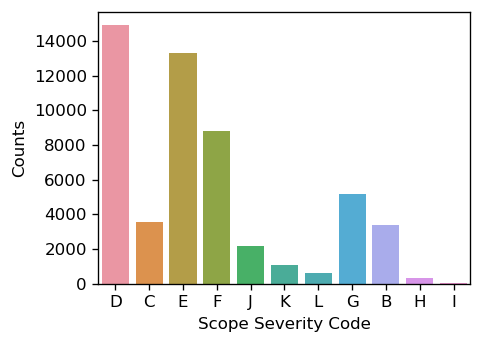

In [67]:
plt.figure(figsize=(4,3),dpi=120)
sns.barplot(x="Scope Severity Code", y="Counts", data=df, estimator=lambda x: len(x))
plt.show()

##### This pivot format of the dataframe is great for our needs, but let's rename the columns to make them more specific!

In [51]:
df_res = df.pivot(index="Federal Provider Number", columns="Scope Severity Code", values="Counts")
df_res = df_res.rename({"B": "Code B", "C": "Code C", "D": "Code D", "E": "Code E", "F": "Code F", "G": "Code G", "H": "Code H",
                        "I": "Code I", "J": "Code J", "K": "Code K", "L": "Code L"}, axis=1)
df_res

Scope Severity Code,Code B,Code C,Code D,Code E,Code F,Code G,Code H,Code I,Code J,Code K,Code L
Federal Provider Number,,,,,,,,,,,
015009,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015010,NaN,1.0,8.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
015012,NaN,NaN,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
015014,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
015015,NaN,3.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
676493,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676497,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
676499,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Those NaN resulted from our pivot operation. But NaN for a code simply means that a nursing home did not have deficiencies 
# falling under that scope severity code. So, fill in the NaN with 0's

df_res = df_res.fillna(0)
df_res

Scope Severity Code,Code B,Code C,Code D,Code E,Code F,Code G,Code H,Code I,Code J,Code K,Code L
Federal Provider Number,,,,,,,,,,,
015009,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
015010,0.0,1.0,8.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
015012,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
015014,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
015015,0.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
676493,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676497,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
676499,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_res.index

Index(['015009', '015010', '015012', '015014', '015015', '015016', '015019',
       '015023', '015024', '015027',
       ...
       '676486', '676487', '676488', '676490', '676492', '676493', '676497',
       '676499', '686124', '745002'],
      dtype='object', name='Federal Provider Number', length=15087)

In [72]:
# Let's save df_res for merging later. Keep the index.
df_res.to_csv("health_def_ml.csv")

Survey Summary dataset - Data Restructuring

In [73]:
# Survey Summary dataset
survey_sum_ml = survey_sum

In [74]:
survey_sum_ml.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Inspection Cycle,Health Survey Date,Fire Safety Survey Date,Total Number of Health Deficiencies,...,Count of Interior Deficiencies,Count of Gas and Vacuum and Electrical Systems Deficiencies,Count of Hazardous Area Deficiencies,Count of Illumination and Emergency Power Deficiencies,Count of Laboratories Deficiencies,Count of Medical Gases and Anaesthetizing Areas Deficiencies,Count of Smoking Regulations Deficiencies,Count of Miscellaneous Deficiencies,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,1,2019-08-21,2019-08-21,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2,2018-08-01,2018-08-09,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,3,2017-06-22,2017-06-29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
3,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,1,2019-06-13,2019-06-18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2,2018-06-07,2018-06-11,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01


In [75]:
survey_sum_ml.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Inspection Cycle', 'Health Survey Date', 'Fire Safety Survey Date',
       'Total Number of Health Deficiencies',
       'Total Number of Fire Safety Deficiencies',
       'Count of Freedom from Abuse and Neglect and Exploitation Deficiencies',
       'Count of Quality of Life and Care Deficiencies',
       'Count of Resident Assessment and Care Planning Deficiencies',
       'Count of Nursing and Physician Services Deficiencies',
       'Count of Resident Rights Deficiencies',
       'Count of Nutrition and Dietary Deficiencies',
       'Count of Pharmacy Service Deficiencies',
       'Count of Environmental Deficiencies',
       'Count of Administration Deficiencies',
       'Count of Infection Control Deficiencies',
       'Count of Emergency Preparedness Deficiencies',
       'Count of Automatic Sprinkler Systems Deficiencies',
       'Count 

In [82]:
# Group by Federal Provider Number, sum up the counts for the deficiency categories
survey_sum_ml.groupby("Federal Provider Number").sum()

,Provider Zip Code,Inspection Cycle,Total Number of Health Deficiencies,Total Number of Fire Safety Deficiencies,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,...,Count of Fire Alarm Systems Deficiencies,Count of Smoke Deficiencies,Count of Interior Deficiencies,Count of Gas and Vacuum and Electrical Systems Deficiencies,Count of Hazardous Area Deficiencies,Count of Illumination and Emergency Power Deficiencies,Count of Laboratories Deficiencies,Count of Medical Gases and Anaesthetizing Areas Deficiencies,Count of Smoking Regulations Deficiencies,Count of Miscellaneous Deficiencies
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,106959,6,3,4.0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
015010,105450,6,12,9.0,0,2,3,1,1,2,...,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
015012,107304,6,11,4.0,0,1,0,0,1,5,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
015014,105618,6,9,14.0,0,4,2,0,0,1,...,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
015015,105333,6,10,21.0,0,2,3,2,1,2,...,0.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686123,66370,3,0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686124,66352,3,21,4.0,2,8,1,0,4,1,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
745000,78576,1,0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
type(survey_sum_ml.groupby("Federal Provider Number").sum())

pandas.core.frame.DataFrame

In [83]:
survey_sum_ml.groupby("Federal Provider Number").sum().index

Index(['015009', '015010', '015012', '015014', '015015', '015016', '015019',
       '015023', '015024', '015027',
       ...
       '676495', '676496', '676497', '676498', '676499', '686123', '686124',
       '745000', '745001', '745002'],
      dtype='object', name='Federal Provider Number', length=15216)

In [86]:
# Grab only the columns we need, and then save it to a CSV file to be merged later.
df_res_ss = survey_sum_ml.groupby("Federal Provider Number").sum()
df_res_ss = df_res_ss[['Count of Freedom from Abuse and Neglect and Exploitation Deficiencies',
                        'Count of Quality of Life and Care Deficiencies',
                        'Count of Resident Assessment and Care Planning Deficiencies',
                        'Count of Nursing and Physician Services Deficiencies',
                        'Count of Resident Rights Deficiencies',
                        'Count of Nutrition and Dietary Deficiencies',
                        'Count of Pharmacy Service Deficiencies',
                        'Count of Environmental Deficiencies',
                        'Count of Administration Deficiencies',
                        'Count of Infection Control Deficiencies']]
df_res_ss.to_csv("survey_sum_ml.csv")

In [87]:
# One record per nursing home
df_res_ss

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies
Federal Provider Number,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2
015010,0,2,3,1,1,2,0,1,0,2
015012,0,1,0,0,1,5,1,1,0,2
015014,0,4,2,0,0,1,0,0,0,2
015015,0,2,3,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
686123,0,0,0,0,0,0,0,0,0,0
686124,2,8,1,0,4,1,1,2,1,1
745000,0,0,0,0,0,0,0,0,0,0


MDS Quality Measures - Data Restructuring

In [90]:
MDS_meas_ml = MDS_measures

In [91]:
MDS_meas_ml.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,18.18182,...,18.18182,NaN,7.31707,NaN,14.792900,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,4.65116,...,4.54545,NaN,6.66667,NaN,6.249999,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,9.0,NaN,9.0,70.000000,NaN,N,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,0.00000,...,0.00000,NaN,0.00000,NaN,0.408016,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,2.17391,...,0.00000,NaN,0.00000,NaN,0.540540,NaN,Y,2020Q4-2021Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01


In [92]:
MDS_meas_ml.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code', 'Measure Code',
       'Measure Description', 'Resident type', 'Q1 Measure Score',
       'Footnote for Q1 Measure Score', 'Q2 Measure Score',
       'Footnote for Q2 Measure Score', 'Q3 Measure Score',
       'Footnote for Q3 Measure Score', 'Q4 Measure Score',
       'Footnote for Q4 Measure Score', 'Four Quarter Average Score',
       'Footnote for Four Quarter Average Score',
       'Used in Quality Measure Five Star Rating', 'Measure Period',
       'Location', 'Processing Date'],
      dtype='object')

In [93]:
# Pivot-wider operation for 18 MDS-based QMs. This is what we want.
MDS_meas_ml.pivot(index="Federal Provider Number", columns="Measure Description", values="Four Quarter Average Score")

Measure Description,Percentage of high risk long-stay residents with pressure ulcers,Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of long-stay residents experiencing one or more falls with major injury,Percentage of long-stay residents who have depressive symptoms,Percentage of long-stay residents who lose too much weight,Percentage of long-stay residents who received an antianxiety or hypnotic medication,Percentage of long-stay residents who received an antipsychotic medication,Percentage of long-stay residents who were physically restrained,Percentage of long-stay residents whose ability to move independently worsened,Percentage of long-stay residents whose need for help with daily activities has increased,Percentage of long-stay residents with a catheter inserted and left in their bladder,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine
Federal Provider Number,,,,,,,,,,,,,,,,,,
015009,7.878788,100.000000,100.000000,2.094241,1.098901,6.249999,37.362636,9.392264,0.0,25.775225,14.792900,0.408016,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509
015010,17.741937,100.000000,98.496241,5.426357,1.287555,7.053944,21.052631,38.235295,0.0,13.025864,8.482143,2.771717,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455
015012,6.315790,74.137933,100.000000,5.172415,0.000000,8.080808,27.722773,5.263158,0.0,36.843385,9.374999,3.982660,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415
015015,13.888892,100.000000,100.000000,5.067568,0.000000,13.875597,49.321267,37.588652,0.0,9.658123,10.144926,0.810775,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000
015016,5.462187,95.142857,84.577114,3.428569,0.602409,9.252666,23.762377,14.029849,0.0,11.733634,9.523809,3.928318,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676485,8.219176,98.540146,74.193548,2.919707,65.420562,4.651162,15.702478,4.724411,0.0,16.816475,18.803419,0.000000,2.105262,39.473684,97.204967,44.250234,1.744186,92.957746
676488,4.651162,58.947367,85.714286,4.210528,1.149425,1.587301,44.318180,8.791211,0.0,29.942355,14.117646,0.000000,7.142859,54.545456,32.171584,59.228745,1.219514,33.333333
676494,7.462687,78.571430,100.000000,0.892856,0.000000,5.813953,28.571429,3.636363,0.0,25.687433,29.885057,1.635237,9.433961,38.596491,64.879357,79.033555,3.571429,29.268293


In [94]:
# Save the results to be merged later
df_MDS_res = MDS_meas_ml.pivot(index="Federal Provider Number", columns="Measure Description", values="Four Quarter Average Score")
df_MDS_res.to_csv("MDS_qm_ml.csv")  # contains one record per nursing home

Medicare Claims Quality Measures - Data Restructuring

In [95]:
claims_meas_ml = Claims_meas

In [96]:
claims_meas_ml.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Measure Code,Measure Description,Resident type,Adjusted Score,Observed Score,Expected Score,Footnote for Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,521,Percentage of short-stay residents who were re...,Short Stay,19.653524,18.181818,21.646080,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,522,Percentage of short-stay residents who had an ...,Short Stay,2.159487,2.272727,10.733844,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,551,Number of hospitalizations per 1000 long-stay ...,Long Stay,0.888825,1.105630,2.073423,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,552,Number of outpatient emergency department visi...,Long Stay,0.298808,0.425242,1.904792,NaN,Y,20200701-20210630,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2022-03-01
4,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,521,Percentage of short-stay residents who were re...,Short Stay,16.512389,16.666667,23.616809,NaN,Y,20200701-20210630,"260 WEST WALNUT STREET, SYLACAUGA, AL, 35150",2022-03-01


In [99]:
claims_meas_ml[["Federal Provider Number", "Measure Description", "Adjusted Score"]].head()

,Federal Provider Number,Measure Description,Adjusted Score
0,015009,Percentage of short-stay residents who were re...,19.653524
1,015009,Percentage of short-stay residents who had an ...,2.159487
2,015009,Number of hospitalizations per 1000 long-stay ...,0.888825
3,015009,Number of outpatient emergency department visi...,0.298808
4,015010,Percentage of short-stay residents who were re...,16.512389


In [97]:
# Pivot-wider operation for the 4 claims-based QMs
claims_meas_ml.pivot(index="Federal Provider Number", columns="Measure Description", values="Adjusted Score")

Measure Description,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,
015009,0.888825,0.298808,2.159487,19.653524
015010,2.226671,0.894101,10.762260,16.512389
015012,0.596624,0.970204,16.144221,18.882362
015015,2.420352,0.593651,6.027909,17.828036
015016,0.865714,1.009416,15.817361,23.075948
...,...,...,...,...
676491,0.493306,0.900968,19.185995,14.787930
676493,0.904854,0.404841,13.455932,24.151473
676494,0.842864,0.790538,9.174519,35.790340


In [98]:
# Saving the results
df_claims_res = claims_meas_ml.pivot(index="Federal Provider Number", columns="Measure Description", values="Adjusted Score")
df_claims_res.to_csv("Claims_qm_ml.csv")  # contains one record per nursing home

#### Merging the 5 datasets, by PK Federal Provider Number, into one ML dataset

Loading in the datasets...
(Created a "merge datasets" folder to store the four restructured datasets)

In [54]:
df_health = pd.read_csv("./merge datasets/health_def_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")
df_survey_sum = pd.read_csv("./merge datasets/survey_sum_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")
df_MDS_qms = pd.read_csv("./merge datasets/MDS_qm_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")
df_claims_qms = pd.read_csv("./merge datasets/Claims_qm_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")
df_prov_info = pd.read_csv("./merge datasets/provid_info_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")

In [58]:
df_health

,Code B,Code C,Code D,Code E,Code F,Code G,Code H,Code I,Code J,Code K,Code L
Federal Provider Number,,,,,,,,,,,
015009,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
015010,0.0,1.0,8.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
015012,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
015014,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
015015,0.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
676493,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676497,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
676499,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_survey_sum

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies
Federal Provider Number,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2
015010,0,2,3,1,1,2,0,1,0,2
015012,0,1,0,0,1,5,1,1,0,2
015014,0,4,2,0,0,1,0,0,0,2
015015,0,2,3,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
686123,0,0,0,0,0,0,0,0,0,0
686124,2,8,1,0,4,1,1,2,1,1
745000,0,0,0,0,0,0,0,0,0,0


In [60]:
df_MDS_qms

,Percentage of high risk long-stay residents with pressure ulcers,Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of long-stay residents experiencing one or more falls with major injury,Percentage of long-stay residents who have depressive symptoms,Percentage of long-stay residents who lose too much weight,Percentage of long-stay residents who received an antianxiety or hypnotic medication,Percentage of long-stay residents who received an antipsychotic medication,Percentage of long-stay residents who were physically restrained,Percentage of long-stay residents whose ability to move independently worsened,Percentage of long-stay residents whose need for help with daily activities has increased,Percentage of long-stay residents with a catheter inserted and left in their bladder,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine
Federal Provider Number,,,,,,,,,,,,,,,,,,
015009,7.878788,100.000000,100.000000,2.094241,1.098901,6.249999,37.362636,9.392264,0.0,25.775225,14.792900,0.408016,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509
015010,17.741937,100.000000,98.496241,5.426357,1.287555,7.053944,21.052631,38.235295,0.0,13.025864,8.482143,2.771717,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455
015012,6.315790,74.137933,100.000000,5.172415,0.000000,8.080808,27.722773,5.263158,0.0,36.843385,9.374999,3.982660,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415
015015,13.888892,100.000000,100.000000,5.067568,0.000000,13.875597,49.321267,37.588652,0.0,9.658123,10.144926,0.810775,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000
015016,5.462187,95.142857,84.577114,3.428569,0.602409,9.252666,23.762377,14.029849,0.0,11.733634,9.523809,3.928318,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676485,8.219176,98.540146,74.193548,2.919707,65.420562,4.651162,15.702478,4.724411,0.0,16.816475,18.803419,0.000000,2.105262,39.473684,97.204967,44.250234,1.744186,92.957746
676488,4.651162,58.947367,85.714286,4.210528,1.149425,1.587301,44.318180,8.791211,0.0,29.942355,14.117646,0.000000,7.142859,54.545456,32.171584,59.228745,1.219514,33.333333
676494,7.462687,78.571430,100.000000,0.892856,0.000000,5.813953,28.571429,3.636363,0.0,25.687433,29.885057,1.635237,9.433961,38.596491,64.879357,79.033555,3.571429,29.268293


In [61]:
df_claims_qms

,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,
015009,0.888825,0.298808,2.159487,19.653524
015010,2.226671,0.894101,10.762260,16.512389
015012,0.596624,0.970204,16.144221,18.882362
015015,2.420352,0.593651,6.027909,17.828036
015016,0.865714,1.009416,15.817361,23.075948
...,...,...,...,...
676491,0.493306,0.900968,19.185995,14.787930
676493,0.904854,0.404841,13.455932,24.151473
676494,0.842864,0.790538,9.174519,35.790340


In [62]:
df_prov_info

,Overall Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home,Total Health Revisits,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections
Federal Provider Number,,,,,,,,,,,,,,
015009,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0.0
015010,4.0,2.37600,0.74111,0.89834,3.22221,0.52021,0.00974,52.4,21.4,1.0,3,0,0,0.0
015012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0.0
015014,4.0,2.00442,0.94553,0.45553,2.81626,0.31108,0.01774,NaN,NaN,NaN,3,0,0,0.0
015015,3.0,2.16680,1.08185,0.35595,3.63016,0.27210,0.01017,51.3,60.0,4.0,3,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676486,1.0,1.99002,0.43284,0.49831,2.37512,0.33881,0.05809,NaN,NaN,NaN,2,1,3,0.0
676487,5.0,2.13920,1.68399,0.99941,3.33835,0.48873,0.21277,NaN,NaN,NaN,1,0,0,0.0
676488,4.0,1.18534,1.41678,0.15891,2.37813,0.14580,0.12537,NaN,NaN,NaN,1,0,0,1.0


In [64]:
#df_pmc = pmc_explode.merge(fin_pub_results, how="left", left_on="LinkedID_List", right_on="MainID_List", suffixes=["_pmc", "_pub"], indicator=True)
df_survey_sum.merge(df_health, how="left", on="Federal Provider Number", indicator=True)

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Code D,Code E,Code F,Code G,Code H,Code I,Code J,Code K,Code L,_merge
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
015010,0,2,3,1,1,2,0,1,0,2,...,8.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,both
015012,0,1,0,0,1,5,1,1,0,2,...,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,both
015014,0,4,2,0,0,1,0,0,0,2,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,both
015015,0,2,3,2,1,2,0,0,0,0,...,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686123,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
686124,2,8,1,0,4,1,1,2,1,1,...,17.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
745000,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [65]:
df_survey_sum.merge(df_health, how="left", on="Federal Provider Number", indicator=True).info()

<class 'pandas.core.frame.DataFrame'>
Index: 15216 entries, 015009 to 745002
Data columns (total 22 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Count of Freedom from Abuse and Neglect and Exploitation Deficiencies  15216 non-null  int64   
 1   Count of Quality of Life and Care Deficiencies                         15216 non-null  int64   
 2   Count of Resident Assessment and Care Planning Deficiencies            15216 non-null  int64   
 3   Count of Nursing and Physician Services Deficiencies                   15216 non-null  int64   
 4   Count of Resident Rights Deficiencies                                  15216 non-null  int64   
 5   Count of Nutrition and Dietary Deficiencies                            15216 non-null  int64   
 6   Count of Pharmacy Service Deficiencies                                 15216 

In [66]:
merg_survey_health = df_survey_sum.merge(df_health, how="left", on="Federal Provider Number")
merg_survey_health = merg_survey_health.fillna(0)

merg_survey_health

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Code C,Code D,Code E,Code F,Code G,Code H,Code I,Code J,Code K,Code L
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
015010,0,2,3,1,1,2,0,1,0,2,...,1.0,8.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
015012,0,1,0,0,1,5,1,1,0,2,...,0.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
015014,0,4,2,0,0,1,0,0,0,2,...,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
015015,0,2,3,2,1,2,0,0,0,0,...,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686123,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686124,2,8,1,0,4,1,1,2,1,1,...,0.0,17.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745000,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
merg_survey_health.merge(df_prov_info, how="inner", on="Federal Provider Number")

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home,Total Health Revisits,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0.0
015010,0,2,3,1,1,2,0,1,0,2,...,3.22221,0.52021,0.00974,52.4,21.4,1.0,3,0,0,0.0
015012,0,1,0,0,1,5,1,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0.0
015014,0,4,2,0,0,1,0,0,0,2,...,2.81626,0.31108,0.01774,NaN,NaN,NaN,3,0,0,0.0
015015,0,2,3,2,1,2,0,0,0,0,...,3.63016,0.27210,0.01017,51.3,60.0,4.0,3,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676486,3,2,1,2,6,7,2,2,0,3,...,2.37512,0.33881,0.05809,NaN,NaN,NaN,2,1,3,0.0
676487,0,0,0,0,0,1,1,0,0,0,...,3.33835,0.48873,0.21277,NaN,NaN,NaN,1,0,0,0.0
676488,0,1,1,0,0,0,0,0,1,0,...,2.37813,0.14580,0.12537,NaN,NaN,NaN,1,0,0,1.0


In [68]:
merg_su_he_pr = merg_survey_health.merge(df_prov_info, how="inner", on="Federal Provider Number")

In [73]:
# df_MDS_qms = pd.read_csv("./merge datasets/MDS_qm_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")
# df_claims_qms = pd.read_csv("./merge datasets/Claims_qm_ml.csv", converters={"Federal Provider Number": str}).set_index("Federal Provider Number")

res = df_MDS_qms.merge(df_claims_qms, how="left", on="Federal Provider Number", indicator=True)
res

,Percentage of high risk long-stay residents with pressure ulcers,Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of long-stay residents experiencing one or more falls with major injury,Percentage of long-stay residents who have depressive symptoms,Percentage of long-stay residents who lose too much weight,Percentage of long-stay residents who received an antianxiety or hypnotic medication,Percentage of long-stay residents who received an antipsychotic medication,Percentage of long-stay residents who were physically restrained,Percentage of long-stay residents whose ability to move independently worsened,...,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission,_merge
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,7.878788,100.000000,100.000000,2.094241,1.098901,6.249999,37.362636,9.392264,0.0,25.775225,...,70.000000,97.761194,88.878719,0.000000,98.159509,0.888825,0.298808,2.159487,19.653524,both
015010,17.741937,100.000000,98.496241,5.426357,1.287555,7.053944,21.052631,38.235295,0.0,13.025864,...,42.028986,90.526314,66.674368,0.000000,94.545455,2.226671,0.894101,10.762260,16.512389,both
015012,6.315790,74.137933,100.000000,5.172415,0.000000,8.080808,27.722773,5.263158,0.0,36.843385,...,68.965516,88.745983,72.120704,0.921659,91.036415,0.596624,0.970204,16.144221,18.882362,both
015015,13.888892,100.000000,100.000000,5.067568,0.000000,13.875597,49.321267,37.588652,0.0,9.658123,...,34.444446,99.459460,60.537590,1.219512,100.000000,2.420352,0.593651,6.027909,17.828036,both
015016,5.462187,95.142857,84.577114,3.428569,0.602409,9.252666,23.762377,14.029849,0.0,11.733634,...,42.253520,84.307689,85.980985,2.058319,70.124481,0.865714,1.009416,15.817361,23.075948,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676485,8.219176,98.540146,74.193548,2.919707,65.420562,4.651162,15.702478,4.724411,0.0,16.816475,...,39.473684,97.204967,44.250234,1.744186,92.957746,0.456383,0.090478,4.962855,25.352158,both
676488,4.651162,58.947367,85.714286,4.210528,1.149425,1.587301,44.318180,8.791211,0.0,29.942355,...,54.545456,32.171584,59.228745,1.219514,33.333333,1.031751,0.196203,10.695237,17.054941,both
676494,7.462687,78.571430,100.000000,0.892856,0.000000,5.813953,28.571429,3.636363,0.0,25.687433,...,38.596491,64.879357,79.033555,3.571429,29.268293,0.842864,0.790538,9.174519,35.790340,both


In [74]:
# Those 4 claims-based QMs will be imputed in the sklearn pipeline.
res[res["_merge"] == "left_only"]

,Percentage of high risk long-stay residents with pressure ulcers,Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of long-stay residents experiencing one or more falls with major injury,Percentage of long-stay residents who have depressive symptoms,Percentage of long-stay residents who lose too much weight,Percentage of long-stay residents who received an antianxiety or hypnotic medication,Percentage of long-stay residents who received an antipsychotic medication,Percentage of long-stay residents who were physically restrained,Percentage of long-stay residents whose ability to move independently worsened,...,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission,_merge
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015037,7.526879,47.560974,70.930233,0.000000,0.000000,1.886793,21.250000,13.793105,0.0,34.372260,...,13.793104,58.163269,51.269415,0.000000,40.677966,NaN,NaN,NaN,NaN,left_only
015040,6.030149,99.635036,93.063584,1.824817,1.195220,7.364342,6.923077,2.811243,0.0,10.764211,...,32.291667,99.212599,93.158404,0.000000,89.438944,NaN,NaN,NaN,NaN,left_only
015045,10.285719,96.575342,97.413793,3.082191,0.000000,4.273505,14.457831,12.587412,0.0,12.973001,...,28.378378,63.636362,44.151622,0.000000,24.218750,NaN,NaN,NaN,NaN,left_only
015050,9.629631,99.574469,91.011236,1.702128,0.925926,4.522612,11.659194,16.393444,0.0,20.300238,...,42.647058,93.103449,27.671069,0.000000,71.568627,NaN,NaN,NaN,NaN,left_only
015097,9.638555,30.769229,82.142857,2.429149,0.456622,4.954955,19.047618,13.615020,0.0,17.125898,...,28.571430,24.999998,51.751496,1.886793,40.322581,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676433,20.000000,79.878051,94.578313,0.609756,2.739725,10.000001,17.948718,10.322582,0.0,33.369200,...,45.714289,82.499999,65.647019,3.921570,85.645933,NaN,NaN,NaN,NaN,left_only
676446,8.843536,100.000000,100.000000,3.300327,0.333334,2.651517,12.500001,10.367893,0.0,13.758935,...,50.000000,99.559955,50.495750,2.269288,96.487119,NaN,NaN,NaN,NaN,left_only
676474,22.222225,95.744681,97.368421,8.510637,0.000000,2.499999,42.857144,17.948719,0.0,40.320809,...,69.565219,86.040608,61.728749,2.830187,94.989562,NaN,NaN,NaN,NaN,left_only


In [79]:
merg_mds_claims = df_MDS_qms.merge(df_claims_qms, how="left", on="Federal Provider Number")
merg_mds_claims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11679 entries, 015009 to 686124
Data columns (total 22 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Percentage of high risk long-stay residents with pressure ulcers                                             11679 non-null  float64
 1   Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine                  11679 non-null  float64
 2   Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine            11679 non-null  float64
 3   Percentage of long-stay residents experiencing one or more falls with major injury                           11679 non-null  float64
 4   Percentage of long-stay residents who have depressive sym

In [81]:
# Result: 5 datasets merged into one
merg_su_he_pr.merge(merg_mds_claims, how="inner", on="Federal Provider Number")

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509,0.888825,0.298808,2.159487,19.653524
015010,0,2,3,1,1,2,0,1,0,2,...,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455,2.226671,0.894101,10.762260,16.512389
015012,0,1,0,0,1,5,1,1,0,2,...,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415,0.596624,0.970204,16.144221,18.882362
015015,0,2,3,2,1,2,0,0,0,0,...,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000,2.420352,0.593651,6.027909,17.828036
015016,1,2,4,0,1,1,1,1,0,1,...,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481,0.865714,1.009416,15.817361,23.075948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676482,1,1,1,0,1,0,1,0,0,0,...,1.242238,76.190476,74.340528,61.334285,2.551022,57.303371,0.808119,0.437953,10.114813,20.561425
676485,0,0,0,0,0,0,0,0,0,0,...,2.105262,39.473684,97.204967,44.250234,1.744186,92.957746,0.456383,0.090478,4.962855,25.352158
676488,0,1,1,0,0,0,0,0,1,0,...,7.142859,54.545456,32.171584,59.228745,1.219514,33.333333,1.031751,0.196203,10.695237,17.054941


In [ ]:
final_merg_ml = merg_su_he_pr.merge(merg_mds_claims, how="inner", on="Federal Provider Number")

In [94]:
final_merg_ml

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509,0.888825,0.298808,2.159487,19.653524
015010,0,2,3,1,1,2,0,1,0,2,...,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455,2.226671,0.894101,10.762260,16.512389
015012,0,1,0,0,1,5,1,1,0,2,...,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415,0.596624,0.970204,16.144221,18.882362
015015,0,2,3,2,1,2,0,0,0,0,...,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000,2.420352,0.593651,6.027909,17.828036
015016,1,2,4,0,1,1,1,1,0,1,...,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481,0.865714,1.009416,15.817361,23.075948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676482,1,1,1,0,1,0,1,0,0,0,...,1.242238,76.190476,74.340528,61.334285,2.551022,57.303371,0.808119,0.437953,10.114813,20.561425
676485,0,0,0,0,0,0,0,0,0,0,...,2.105262,39.473684,97.204967,44.250234,1.744186,92.957746,0.456383,0.090478,4.962855,25.352158
676488,0,1,1,0,0,0,0,0,1,0,...,7.142859,54.545456,32.171584,59.228745,1.219514,33.333333,1.031751,0.196203,10.695237,17.054941


In [95]:
final_merg_ml.index

Index(['015009', '015010', '015012', '015015', '015016', '015019', '015023',
       '015024', '015027', '015028',
       ...
       '676471', '676472', '676476', '676480', '676481', '676482', '676485',
       '676488', '686123', '686124'],
      dtype='object', name='Federal Provider Number', length=11585)

In [105]:
final_merg_ml["Overall Rating"] = final_merg_ml["Overall Rating"].astype("int64")

#### Exploring the ML dataset

In [120]:
final_merg_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11585 entries, 015009 to 686124
Data columns (total 57 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Count of Freedom from Abuse and Neglect and Exploitation Deficiencies                                        11585 non-null  int64  
 1   Count of Quality of Life and Care Deficiencies                                                               11585 non-null  int64  
 2   Count of Resident Assessment and Care Planning Deficiencies                                                  11585 non-null  int64  
 3   Count of Nursing and Physician Services Deficiencies                                                         11585 non-null  int64  
 4   Count of Resident Rights Deficiencies                    

All features in the ML dataset are numeric!!

In [121]:
final_merg_ml = final_merg_ml.rename({"Code B": "Count of Code B", "Code C": "Count of Code C", "Code D": "Count of Code D",
                                      "Code E": "Count of Code E", "Code F": "Count of Code F", "Code G": "Count of Code G",
                                      "Code H": "Count of Code H", "Code I": "Count of Code I", "Code J": "Count of Code J",
                                      "Code K": "Count of Code K", "Code L": "Count of Code L"}, axis=1)

In [132]:
# Our final machine learning dataset!
final_merg_ml.to_csv("final_ML_NH_data.csv", index=False)

In [133]:
# One of those 57 columns is our target variable. So, we really have only 56 attributes/features that describe the nursing home instances
final_merg_ml.shape

(11585, 57)

In [109]:
# final_merg_ml["Overall Rating"] is our class label/target variable

final_merg_ml["Overall Rating"].value_counts()

4    2520
2    2421
5    2410
3    2283
1    1951
Name: Overall Rating, dtype: int64

In [110]:
res_class = final_merg_ml["Overall Rating"].value_counts().to_frame(name="Number of Instances")
res_class.index.name = "Overall Rating"

res_class = res_class.sort_index()
res_class

,Number of Instances
Overall Rating,
1,1951
2,2421
3,2283
4,2520
5,2410


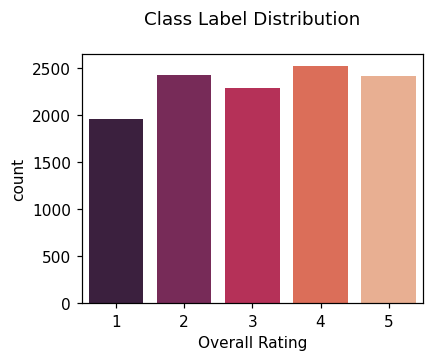

In [118]:
plt.figure(figsize=(4,3),dpi=110)
sns.countplot(data=final_merg_ml, x="Overall Rating", palette="rocket")
plt.title("Class Label Distribution\n")
plt.show()

### Exploratory Data Analysis (EDA)

In [122]:
# Summary statistics for the features in the ML dataset
final_merg_ml.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,11585.0,0.808373,1.312347,0.000000,0.000000,0.000000,1.000000,13.000000
Count of Quality of Life and Care Deficiencies,11585.0,4.931204,4.200128,0.000000,2.000000,4.000000,7.000000,36.000000
Count of Resident Assessment and Care Planning Deficiencies,11585.0,3.171342,2.792905,0.000000,1.000000,3.000000,5.000000,20.000000
Count of Nursing and Physician Services Deficiencies,11585.0,0.595339,1.001335,0.000000,0.000000,0.000000,1.000000,9.000000
Count of Resident Rights Deficiencies,11585.0,3.068968,2.930242,0.000000,1.000000,2.000000,4.000000,24.000000
Count of Nutrition and Dietary Deficiencies,11585.0,1.862408,1.841451,0.000000,1.000000,1.000000,3.000000,15.000000
Count of Pharmacy Service Deficiencies,11585.0,2.526716,2.259915,0.000000,1.000000,2.000000,4.000000,17.000000
Count of Environmental Deficiencies,11585.0,0.868019,1.306764,0.000000,0.000000,0.000000,1.000000,12.000000
Count of Administration Deficiencies,11585.0,0.543202,0.998645,0.000000,0.000000,0.000000,1.000000,11.000000
Count of Infection Control Deficiencies,11585.0,1.313940,1.182106,0.000000,0.000000,1.000000,2.000000,8.000000


In [159]:
final_merg_ml.describe().transpose()[["mean", "50%"]]

,mean,50%
Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,0.808373,0.000000
Count of Quality of Life and Care Deficiencies,4.931204,4.000000
Count of Resident Assessment and Care Planning Deficiencies,3.171342,3.000000
Count of Nursing and Physician Services Deficiencies,0.595339,0.000000
Count of Resident Rights Deficiencies,3.068968,2.000000
Count of Nutrition and Dietary Deficiencies,1.862408,1.000000
Count of Pharmacy Service Deficiencies,2.526716,2.000000
Count of Environmental Deficiencies,0.868019,0.000000
Count of Administration Deficiencies,0.543202,0.000000
Count of Infection Control Deficiencies,1.313940,1.000000


**These are the columns which have the most differences between its mean and median, which *may* indicate outliers in the data**:

Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine, 

Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine, 

Percentage of long-stay residents who have depressive symptoms,

Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine, 

Number of Substantiated Complaints, 

Count of Code D,

Count of Code E

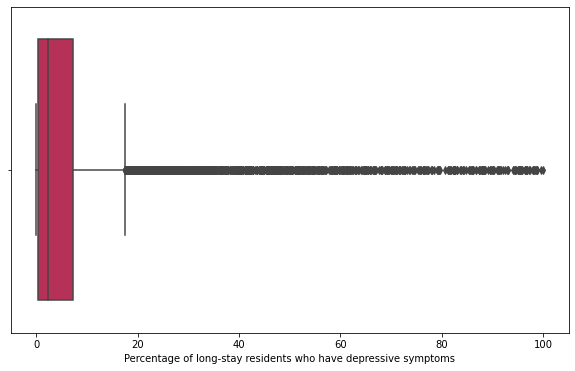

In [226]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Percentage of long-stay residents who have depressive symptoms"], palette="rocket")
plt.show()

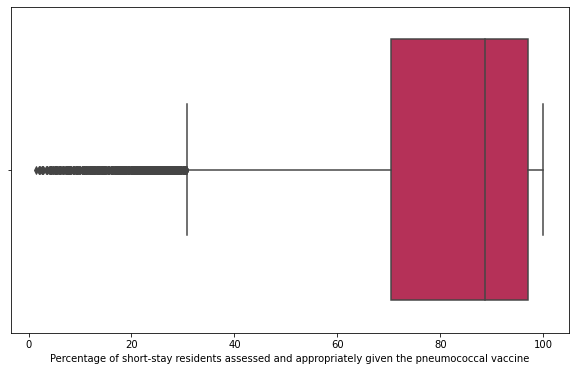

In [225]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine"], palette="rocket")
plt.show()

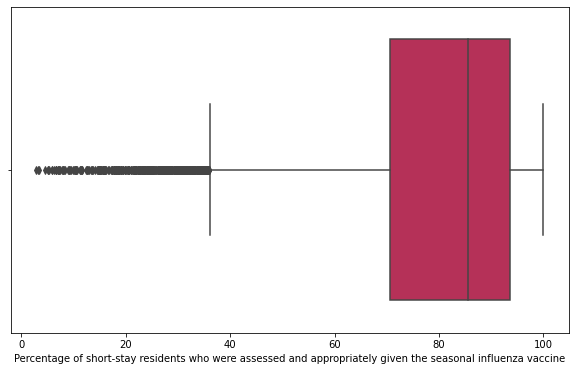

In [224]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine"], palette="rocket")
plt.show()

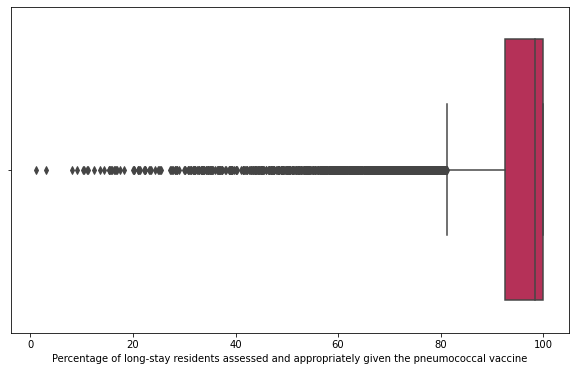

In [223]:
# The variation in percentages here looks normal enough not to be concerning
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine"], palette="rocket")
plt.show()

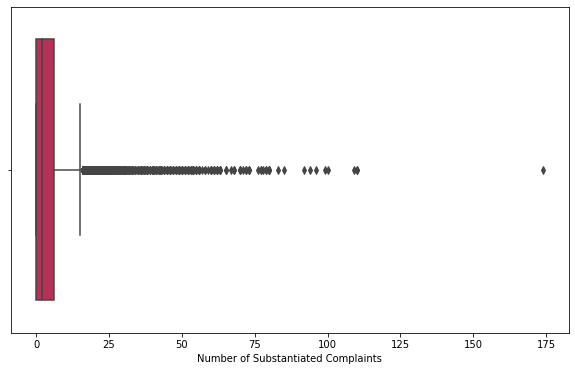

In [218]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Number of Substantiated Complaints"], palette="rocket")
plt.show()

In [179]:
final_merg_ml.head()

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,...,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509,0.888825,0.298808,2.159487,19.653524
015010,0,2,3,1,1,2,0,1,0,2,...,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455,2.226671,0.894101,10.762260,16.512389
015012,0,1,0,0,1,5,1,1,0,2,...,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415,0.596624,0.970204,16.144221,18.882362
015015,0,2,3,2,1,2,0,0,0,0,...,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000,2.420352,0.593651,6.027909,17.828036
015016,1,2,4,0,1,1,1,1,0,1,...,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481,0.865714,1.009416,15.817361,23.075948


In [183]:
final_merg_ml.sort_values(by=["Number of Substantiated Complaints"], ascending=False)

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
Federal Provider Number,,,,,,,,,,,,,,,,,,,,,
235332,1,16,2,2,8,3,5,1,0,3,...,0.352115,55.384614,21.891891,77.285959,2.059924,52.772467,0.857496,0.314864,6.605150,26.555759
235263,2,15,5,3,5,6,6,2,0,2,...,0.486222,43.380284,24.364407,74.322809,2.604167,29.263914,1.496147,0.760524,8.425966,37.381353
165268,3,15,5,4,7,5,5,3,2,2,...,1.421800,61.344538,77.602521,82.177508,0.000000,39.072848,1.831158,0.859287,12.774648,26.904404
155218,0,22,8,1,6,1,8,0,0,7,...,0.313479,52.095809,14.388488,92.101253,2.666666,29.321663,1.397635,0.708007,14.652390,16.439173
235293,3,17,2,7,8,4,8,0,1,6,...,1.276596,45.283019,23.200002,82.180185,5.084747,46.212121,1.931058,1.236479,14.685116,27.411872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225322,2,9,6,0,7,0,2,0,5,2,...,0.772200,59.550562,93.523317,87.378308,2.898550,92.873563,1.403471,0.644097,7.880278,27.119613
225321,2,13,4,3,8,3,1,5,1,1,...,0.800000,36.082473,66.987181,52.399051,2.962963,80.134680,1.647460,1.281947,5.779179,37.577542
225320,0,15,11,4,16,4,5,3,4,5,...,1.229506,28.125002,40.437160,71.891042,6.532663,52.272727,1.701371,1.445554,22.067471,21.754572


In [180]:
# Nursing home 235332 has the highest number of these complaints. 
final_merg_ml.sort_values(by=["Number of Substantiated Complaints"], ascending=False)["Number of Substantiated Complaints"]

Federal Provider Number
235332    174
235263    110
165268    110
155218    109
235293    100
         ... 
225322      0
225321      0
225320      0
225319      0
015009      0
Name: Number of Substantiated Complaints, Length: 11585, dtype: int64

In [186]:
# 235332 had overall rating of 2.
final_merg_ml.loc["235332", "Overall Rating"]

# In conclusion, the 174 number I believe is not an outlier since the 174 takes into account the past 3 years for that nursing home

2

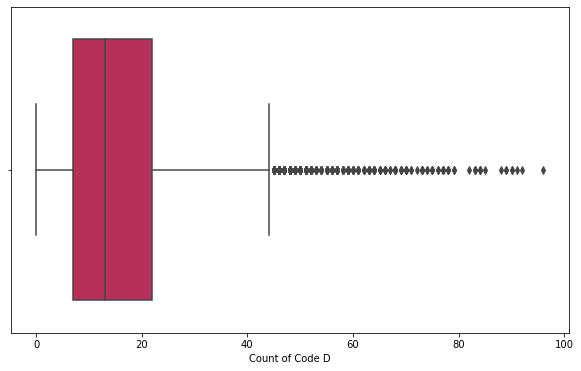

In [220]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Count of Code D"], palette="rocket")
plt.show()

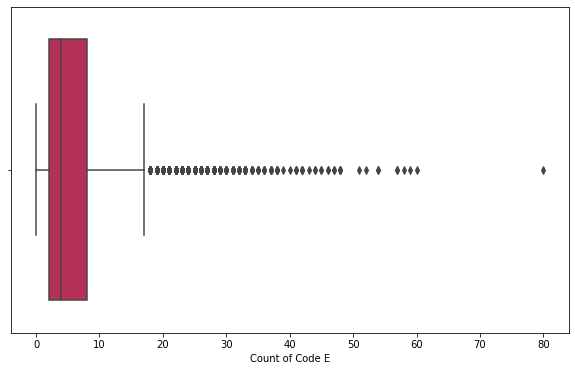

In [219]:
plt.figure(figsize = (10,6))
sns.boxplot(data=final_merg_ml, x=final_merg_ml["Count of Code E"], palette="rocket")
plt.show()

In [221]:
# Which nursing home had this count of 80 scope severity code E's? Answer: 505202
final_merg_ml.sort_values(by=["Count of Code E"], ascending=False)["Count of Code E"]

# A nursing home could have received many health deficiency citations; this facility would have severe issues

Federal Provider Number
505202    80.0
265118    60.0
505355    59.0
505280    58.0
505195    57.0
          ... 
525337     0.0
165361     0.0
395474     0.0
105839     0.0
015009     0.0
Name: Count of Code E, Length: 11585, dtype: float64

In [222]:
# 505202 had overall rating of 1. Makes sense for the lower rating.
final_merg_ml.loc["505202", "Overall Rating"]

1

In [233]:
df = final_merg_ml.iloc[:, 0:10]
feat_subset = pd.concat([df, final_merg_ml["Overall Rating"]], axis=1)
feat_subset


,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,Overall Rating
Federal Provider Number,,,,,,,,,,,
015009,0,0,0,0,1,0,0,0,0,2,5
015010,0,2,3,1,1,2,0,1,0,2,4
015012,0,1,0,0,1,5,1,1,0,2,1
015015,0,2,3,2,1,2,0,0,0,0,3
015016,1,2,4,0,1,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
676482,1,1,1,0,1,0,1,0,0,0,3
676485,0,0,0,0,0,0,0,0,0,0,4
676488,0,1,1,0,0,0,0,0,1,0,4


In [231]:
df_hea_def = final_merg_ml.iloc[:, 0:5]
def_subset = pd.concat([df_hea_def, final_merg_ml["Overall Rating"]], axis=1)
def_subset

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Overall Rating
Federal Provider Number,,,,,,
015009,0,0,0,0,1,5
015010,0,2,3,1,1,4
015012,0,1,0,0,1,1
015015,0,2,3,2,1,3
015016,1,2,4,0,1,2
...,...,...,...,...,...,...
676482,1,1,1,0,1,3
676485,0,0,0,0,0,4
676488,0,1,1,0,0,4


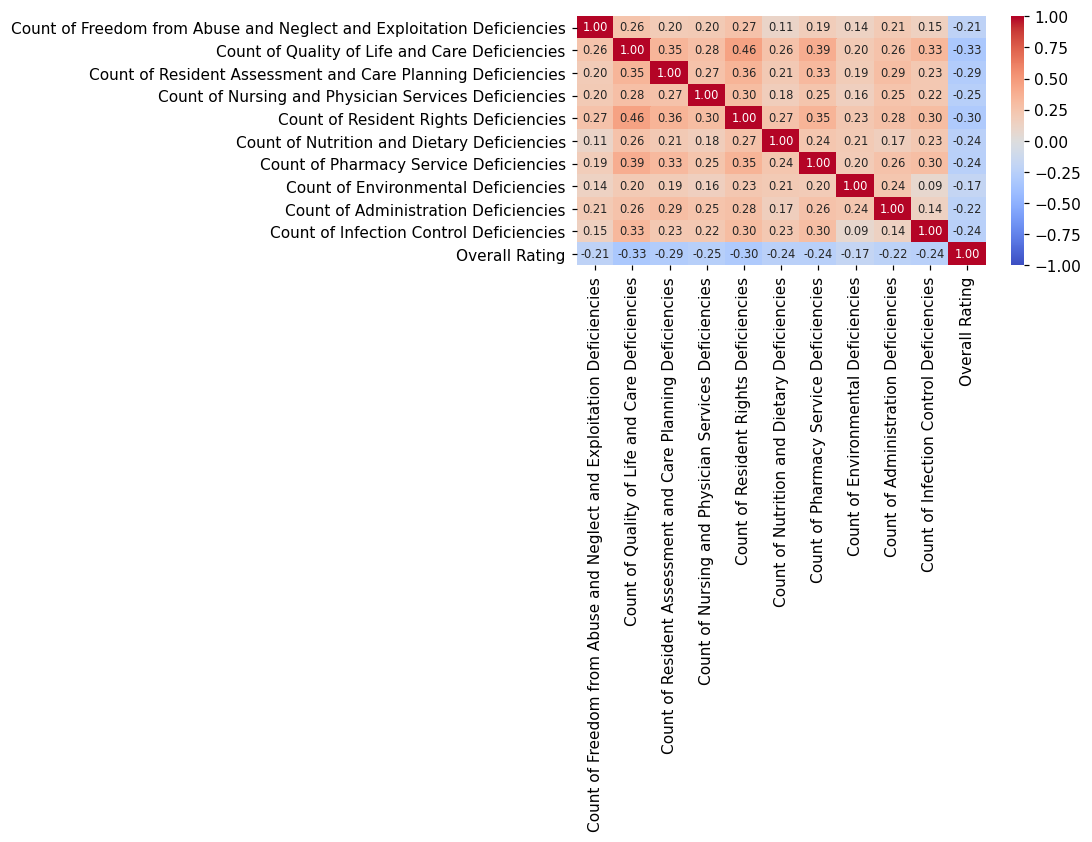

In [277]:
# # Correlation heatmap
plt.figure(figsize=(6,3),dpi=110)
sns.heatmap(feat_subset.corr(method="kendall"), cmap="coolwarm", annot=True, annot_kws={'size': 7.5}, vmax=1, vmin=-1, fmt=".2f")
plt.show()

In [239]:
subset_df = final_merg_ml.iloc[:, 10:22]
subset_df

,Count of Code B,Count of Code C,Count of Code D,Count of Code E,Count of Code F,Count of Code G,Count of Code H,Count of Code I,Count of Code J,Count of Code K,Count of Code L,Overall Rating
Federal Provider Number,,,,,,,,,,,,
015009,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
015010,0.0,1.0,8.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4
015012,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
015015,0.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
015016,0.0,0.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
676482,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
676485,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
676488,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


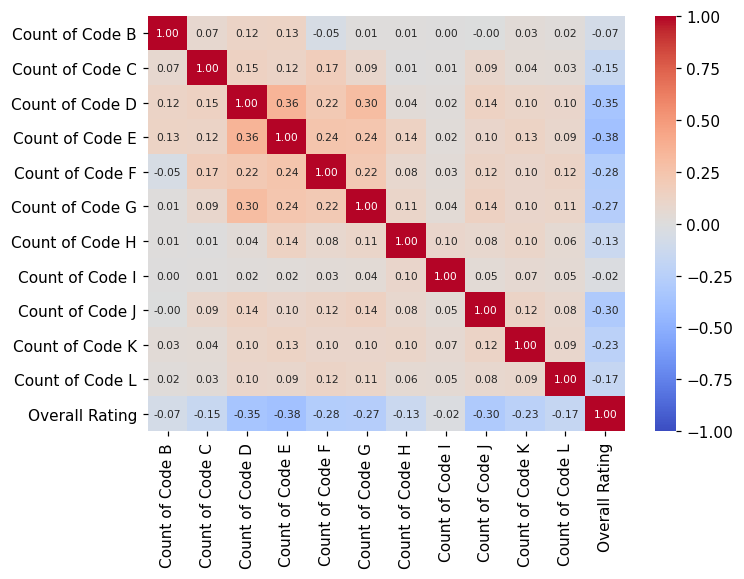

In [278]:
# Correlation heatmap plot
plt.figure(figsize=(7,5),dpi=110)
sns.heatmap(subset_df.corr(method="kendall"), cmap="coolwarm", annot=True, annot_kws={'size': 7}, fmt=".2f", vmax=1, vmin=-1)
plt.show()

In [65]:
subset_df_staff = final_merg_ml.iloc[:, 22:31]
subset_df_staff

,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.37600,0.74111,0.89834,3.22221,0.52021,0.00974,52.4,21.4,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.16680,1.08185,0.35595,3.63016,0.27210,0.01017,51.3,60.0,4.0
4,2.02400,0.63457,0.69262,2.66442,0.35895,0.05332,57.0,52.6,1.0
...,...,...,...,...,...,...,...,...,...
11580,1.73867,0.88641,0.18472,2.40910,0.19052,0.01231,32.6,40.0,1.0
11581,1.98864,1.07655,0.62288,3.14420,0.61804,0.06014,NaN,NaN,NaN
11582,1.18534,1.41678,0.15891,2.37813,0.14580,0.12537,NaN,NaN,NaN
11583,2.61696,0.42589,1.17841,3.91430,0.93127,0.07794,NaN,NaN,1.0


In [66]:
staff_feat_subset = pd.concat([subset_df_staff, final_merg_ml["Overall Rating"]], axis=1)
staff_feat_subset

,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Registered Nurse turnover,Number of administrators who have left the nursing home,Overall Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,2.37600,0.74111,0.89834,3.22221,0.52021,0.00974,52.4,21.4,1.0,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2.16680,1.08185,0.35595,3.63016,0.27210,0.01017,51.3,60.0,4.0,3
4,2.02400,0.63457,0.69262,2.66442,0.35895,0.05332,57.0,52.6,1.0,2
...,...,...,...,...,...,...,...,...,...,...
11580,1.73867,0.88641,0.18472,2.40910,0.19052,0.01231,32.6,40.0,1.0,3
11581,1.98864,1.07655,0.62288,3.14420,0.61804,0.06014,NaN,NaN,NaN,4
11582,1.18534,1.41678,0.15891,2.37813,0.14580,0.12537,NaN,NaN,NaN,4
11583,2.61696,0.42589,1.17841,3.91430,0.93127,0.07794,NaN,NaN,1.0,5


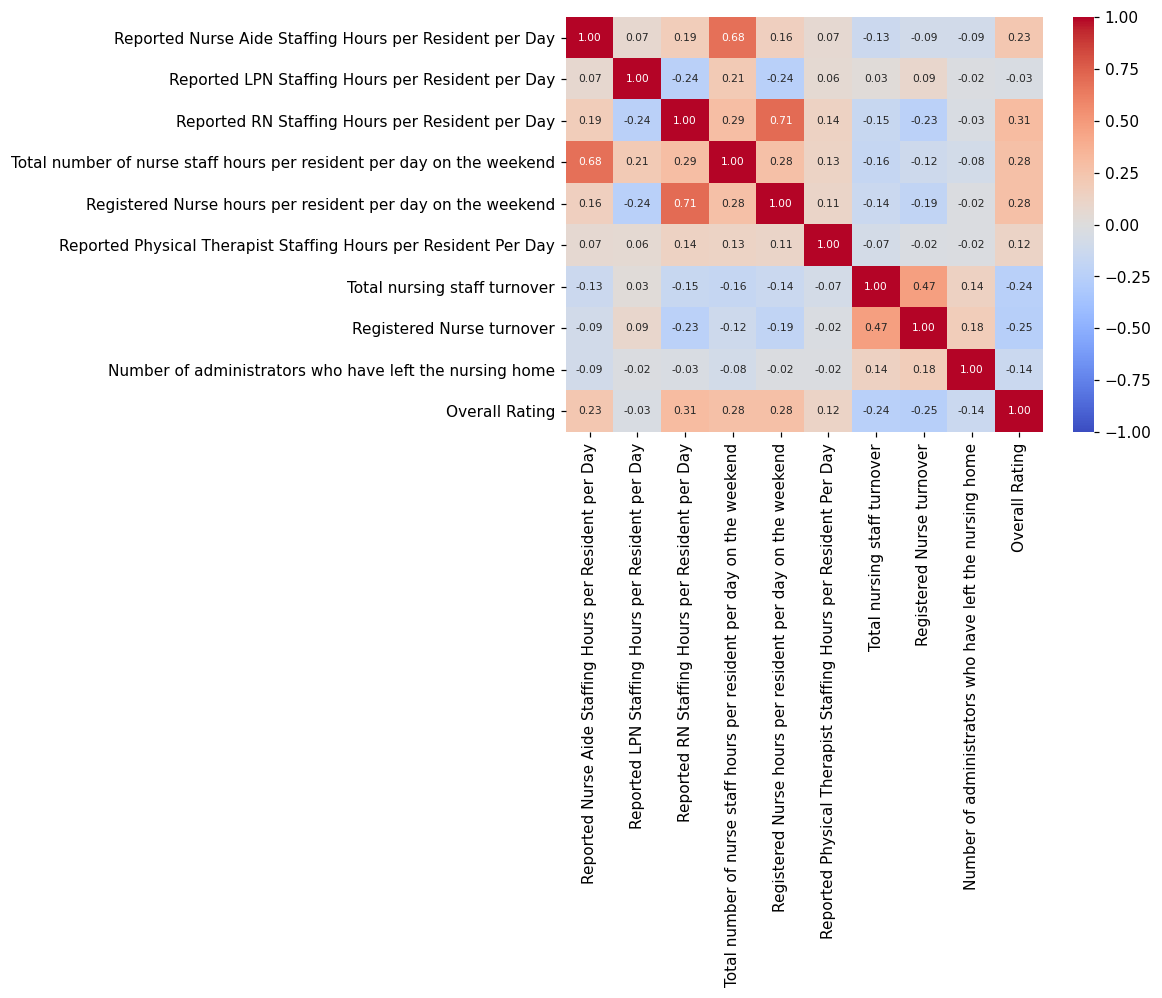

In [67]:
plt.figure(figsize=(7,5),dpi=110)
sns.heatmap(staff_feat_subset.corr(method="kendall"), cmap="coolwarm", annot=True, annot_kws={'size': 7}, fmt=".2f", vmax=1, vmin=-1)
plt.show()

In [293]:
subset_df_qms = final_merg_ml.iloc[:, 35:53]
subset_df_qms

df_concat = pd.concat([subset_df_qms, final_merg_ml["Overall Rating"]], axis=1)

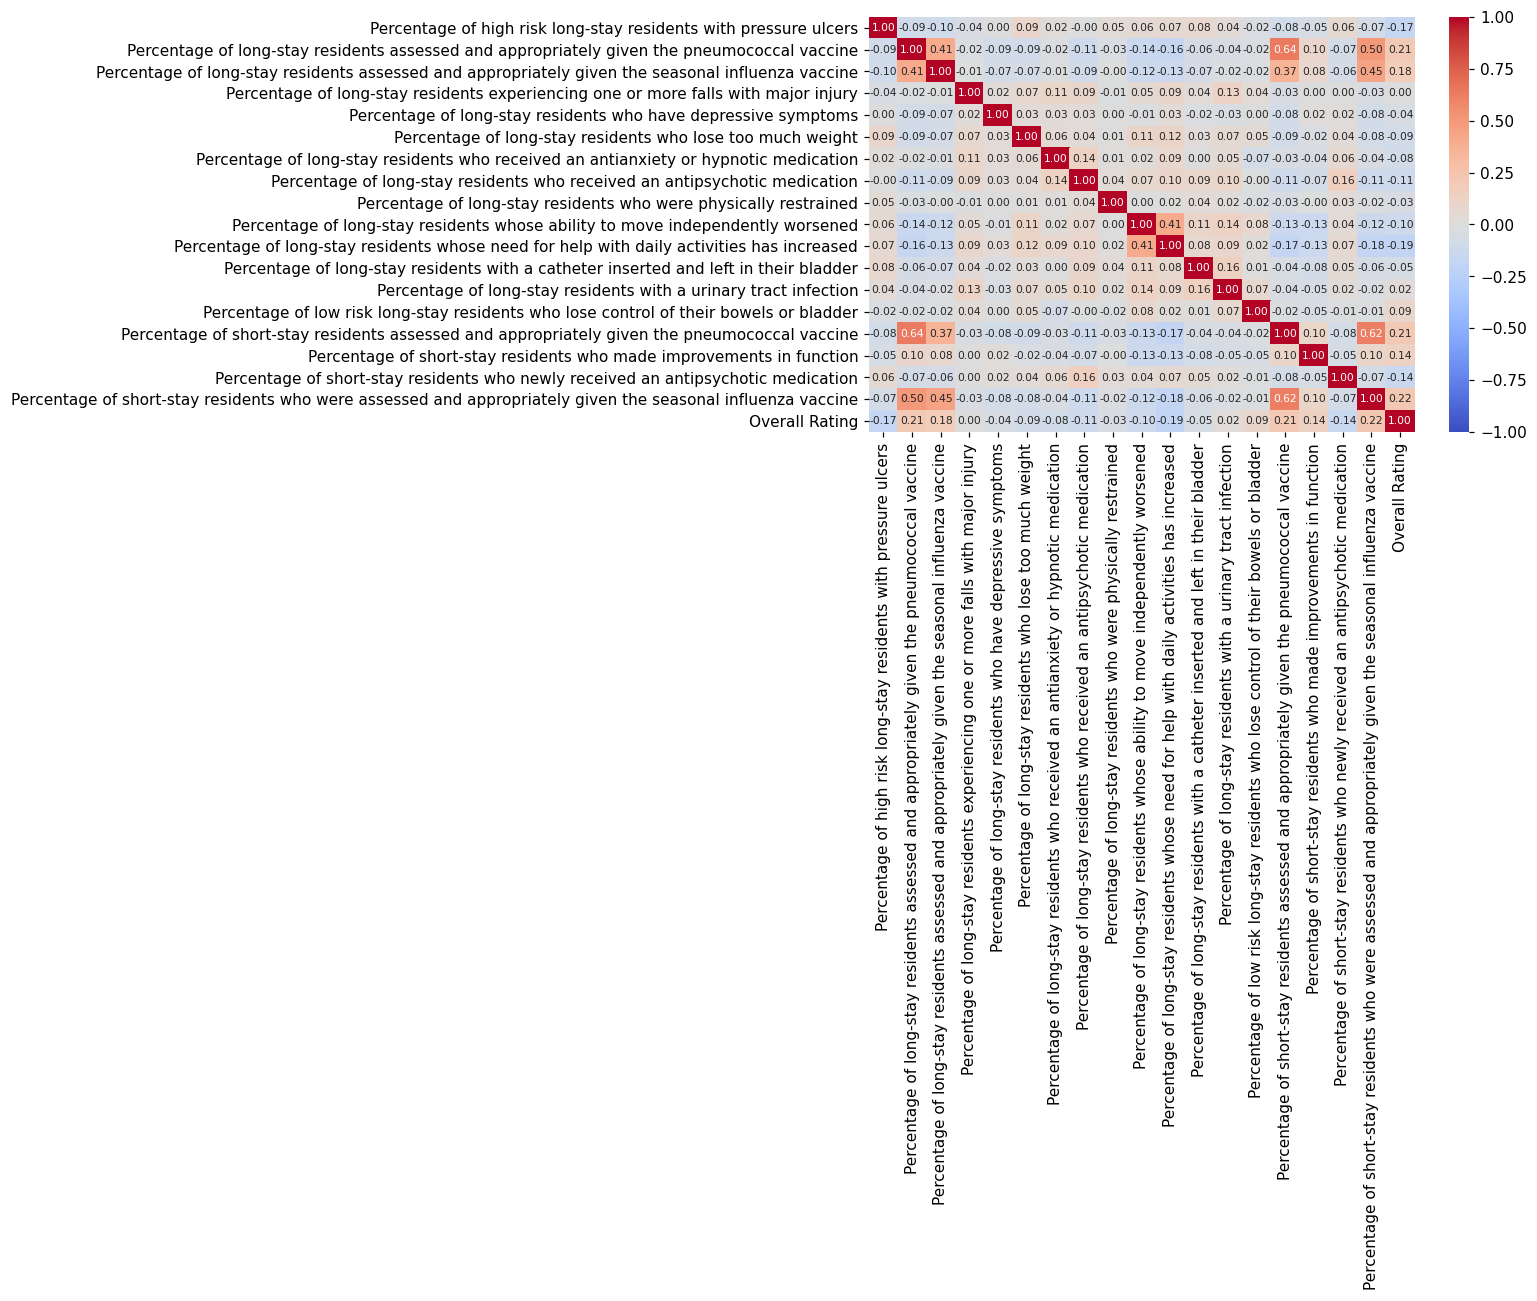

In [294]:
plt.figure(figsize=(8,5),dpi=110)
sns.heatmap(df_concat.corr(method="kendall"), cmap="coolwarm", annot=True, annot_kws={'size': 7}, fmt=".2f", vmax=1, vmin=-1)
plt.show()

In [295]:
subset_df_nh = final_merg_ml.iloc[:, 31:35]
subset_df_nh

df_concat = pd.concat([subset_df_nh, final_merg_ml["Overall Rating"]], axis=1)

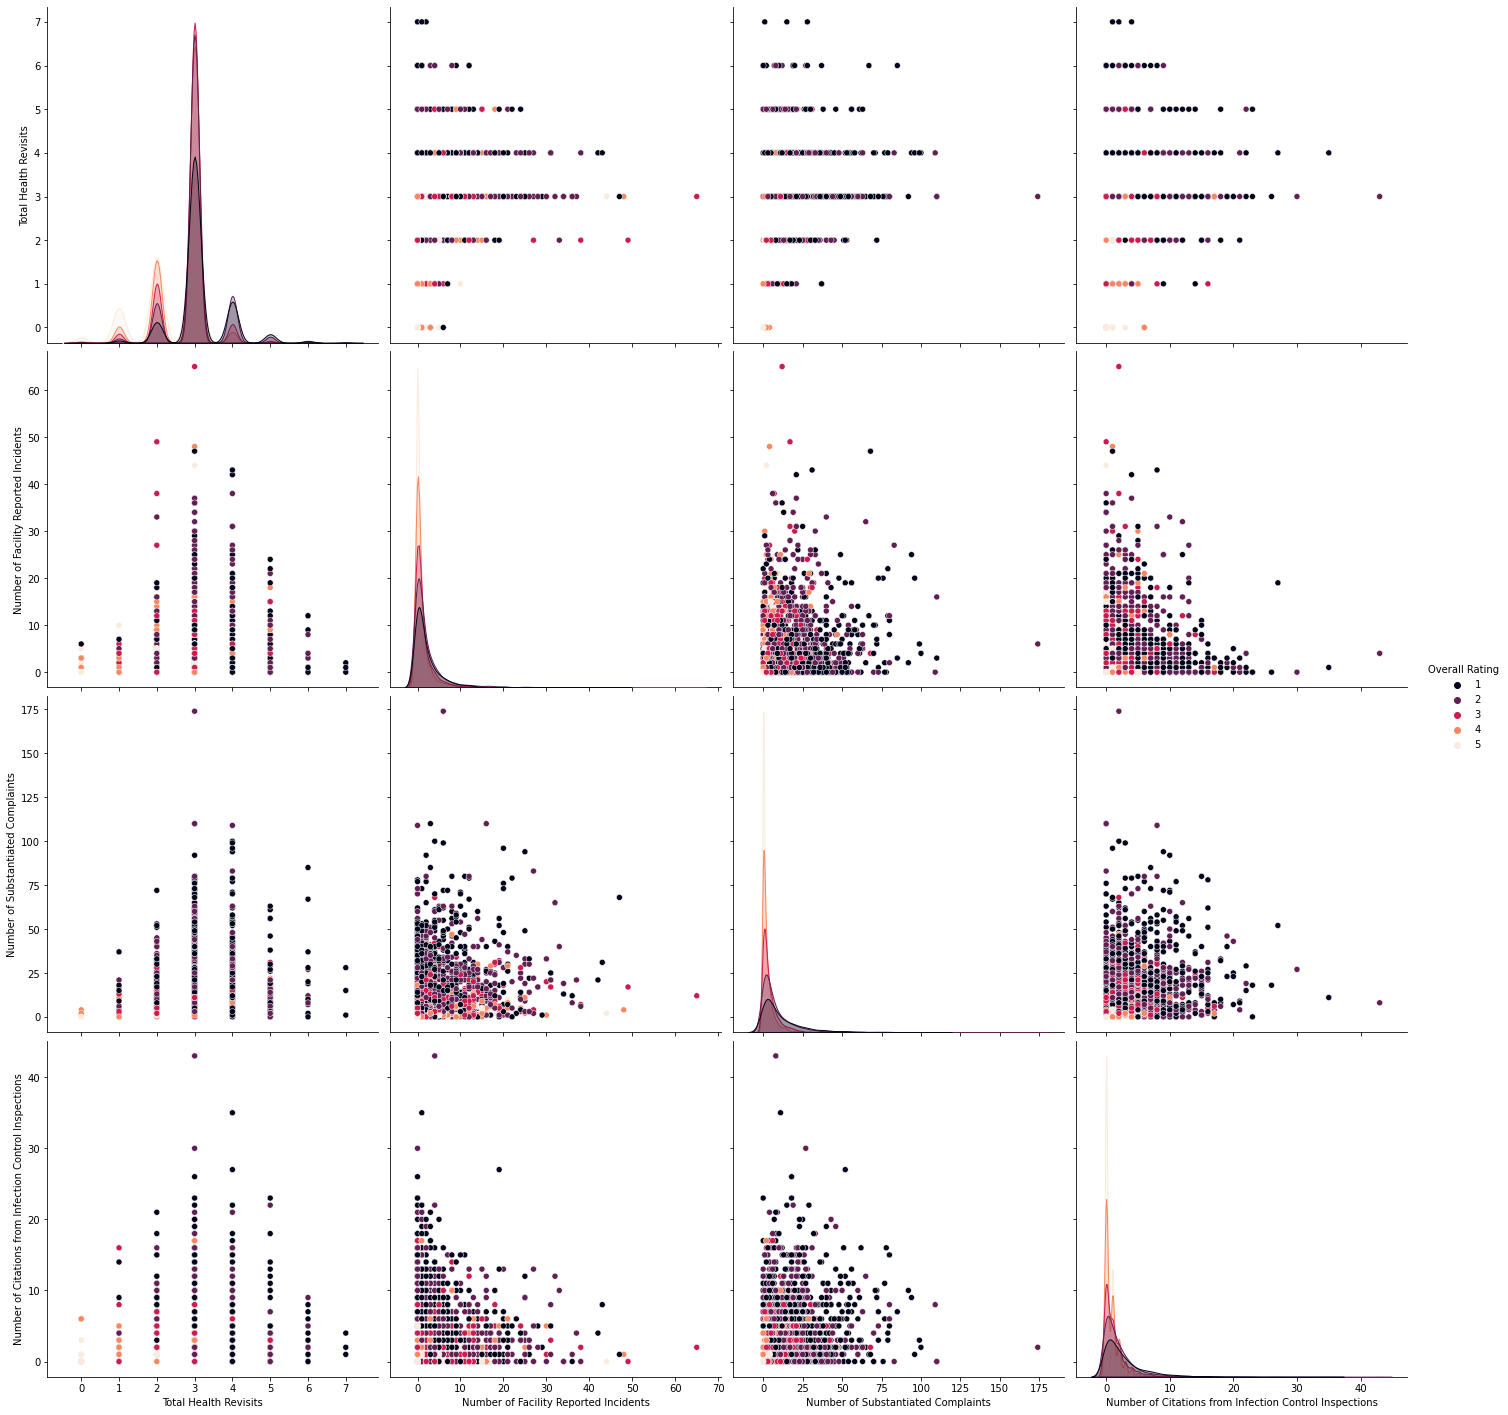

In [313]:
sns.pairplot(df_concat, hue='Overall Rating', palette='rocket', height=5)
plt.show()

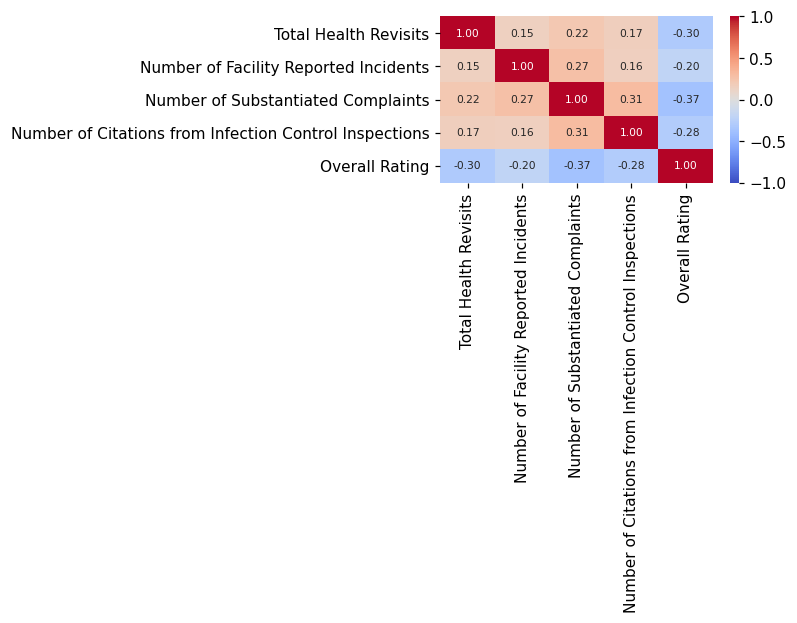

In [318]:
plt.figure(figsize=(4,2),dpi=110)
sns.heatmap(df_concat.corr(method="kendall"), cmap="coolwarm", annot=True, annot_kws={'size': 7}, fmt=".2f", vmax=1, vmin=-1)
plt.show()

In [4]:
final_merg_ml["Number of Citations from Infection Control Inspections"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  7.,  6., 15.,  8., 13., 10., 12.,
       19., 21., 22., 16., 14.,  9., 11., 17., 20., 18., 43., 35., 23.,
       27., 30., 26.])

In [4]:
# Let's take a closer look at those scope severity codes and their counts in the ML dataset
final_merg_ml = pd.read_csv("final_ML_NH_data.csv")

col_code_list = ["Count of Code B", "Count of Code C", "Count of Code D", "Count of Code E", "Count of Code F", "Count of Code G", "Count of Code H", 
                                "Count of Code I", "Count of Code J", "Count of Code K", "Count of Code L"]

# Summing DataFrame columns
final_merg_ml.loc[:,col_code_list].mean(axis=0).to_frame(name="Avg Counts").reset_index()

,index,Avg Counts
0,Count of Code B,0.415969
1,Count of Code C,0.350022
2,Count of Code D,16.135175
3,Count of Code E,6.013897
4,Count of Code F,1.588865
5,Count of Code G,0.746828
6,Count of Code H,0.037980
7,Count of Code I,0.002158
8,Count of Code J,0.266120
9,Count of Code K,0.104359


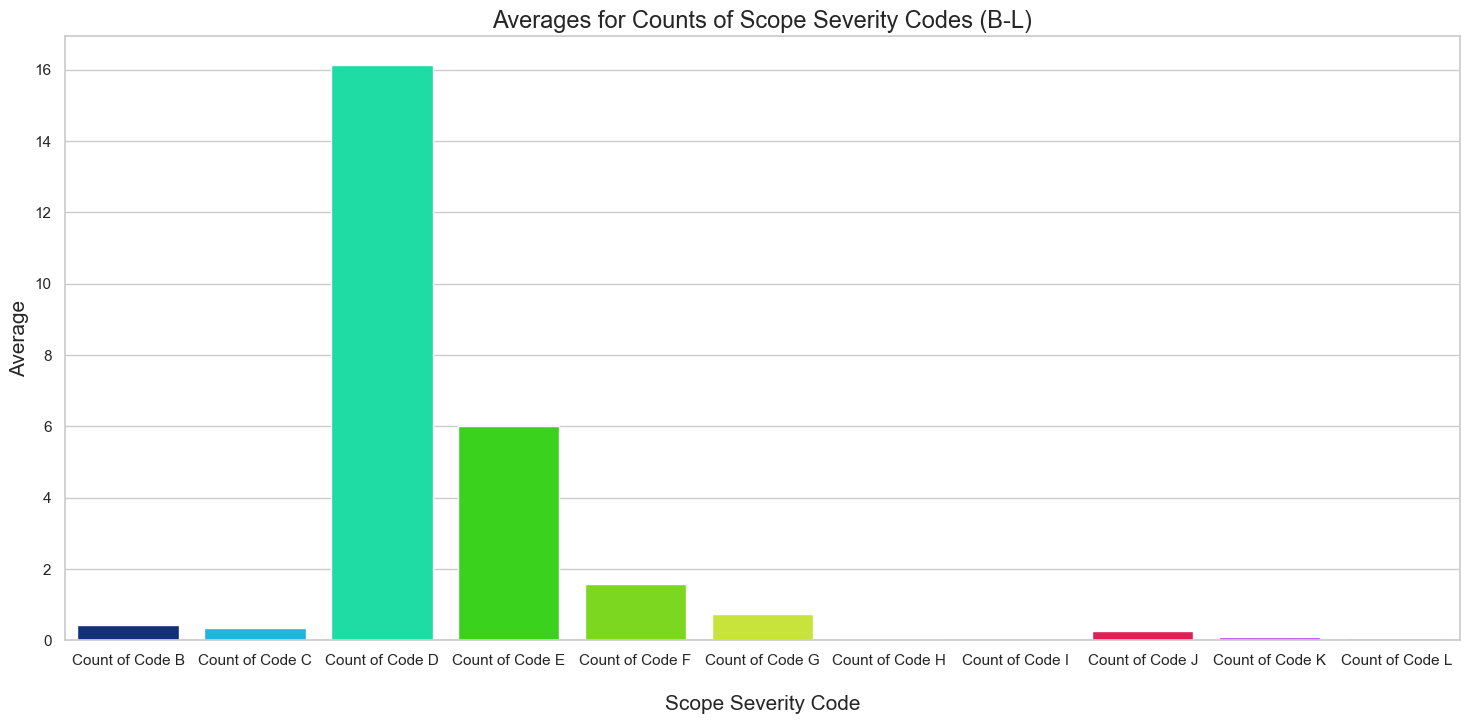

In [18]:
sns.set_theme(style="whitegrid")
code_counts = final_merg_ml.loc[:,col_code_list].mean(axis=0).to_frame(name="Avg Counts").reset_index()

# Plotting the counts via a barplot
plt.figure(figsize=(18,8), dpi=100)

with sns.plotting_context(rc={"axes.labelsize":15}):
    sns.barplot(x="index", y="Avg Counts", data=code_counts, palette="gist_ncar")
    plt.title("Averages for Counts of Scope Severity Codes (B-L)", fontdict = {'fontsize' : 17})
    plt.xlabel("\nScope Severity Code")
    plt.ylabel("Average")
    plt.show()